Описание задачи:

In [ ]:
Необходимо выявить определяющие популярность марки вина закономерности и попытаться выяснить, что можно предложить покупателям вина при выборе вина. Это позволит сделать ставку на потенциально популярный продукт и спланировать ассортмент и рекламную кампанию для интернет-магазинов, осуществляющих продажи вина.

Выполнение задачи предполагает:
1.  <a href=#1>Предобработку данных</a>
2.  <a href=#2>Исследовательский анализ данных</a>
3.  <a href=#4>Исследование зависимости цены от рейтинга</a>
4.  <a href=#5>Проверку гипотез</a>
5.  <a href=#6>Выводы для руководства интернет-магазина вина</a>

Цель этого проекта — выяснить, почему вино так популярно в мире с точки зрения анализа данных. Другими словами, выявить, какие признаки больше всего влияют на рейтинг вина. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 13 признаков (2 числовых признака и 11 категориальных признаков). 

###  <a name="1">1.Предобработка данных</a>
Основные задачи этапа:
1. Импортировать библиотеки;
2. Загрузить данные;
3. Провести замену названий столбцов; (при необходимости);
4. Преобразовать данные в соответствующие типы;
5. Обработать пропуски (при необходимости);
6. Проверить дубликаты.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Столбцы данных

- Страна - страна происхождения вина.
- Описание — описание вкусового профиля вина.
- Обозначение - Виноградник, откуда берется виноград для вина.
- Баллы - количество баллов, которое журнал Wine Enthusiast оценил вино по шкале от 1 до 100.
- Цена - Стоимость одной бутылки вина.
- Провинция — провинция или штат, из которого произведено вино.
- Регион 1 — зона виноделия в провинции или штате (например, долина Напа в Калифорнии).
- Регион 2 — (необязательно) более конкретный регион в винодельческой области (например, Резерфорд в долине Напа).
- Разновидность — сорт винограда, из которого делают вино (например, Пино Нуар).
- Винодельня — винодельня, производящая вино.

Загрузка данных

In [53]:
df = pd.read_csv('wine_reviews.csv')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [54]:
shape = df.shape
print("Размер выборки: строк %d столбцов %d" % (shape[0], shape[1]))

Размер выборки: строк 20000 столбцов 10


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. 
Признаки points и price числовые. Количество пропущенных значений в каждой переменной.

In [56]:
print(df.isnull().sum())

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


Поле region_2 не заполнено более чам на 50 %, удалим этот признак. Так как он не информативен. Столбец description не важен для исследования, designation - также не является значимым. Удалим эти столбцы. 

In [57]:
df = df.drop(columns = ["region_2", "designation","description"])

In [58]:
df.head()

,country,points,price,province,region_1,variety,winery
0,US,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla
2,France,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano
4,US,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek


##### Country

Проверим количество наблюдений для каждой страны в выборке. Если данных слишком мало для анализа их нужно удалить. Страны с количеством наблюдений меньше 30

Text(0.5, -0.2, 'Рисунок 1. - Страны с количеством наблюдений меньше 30')

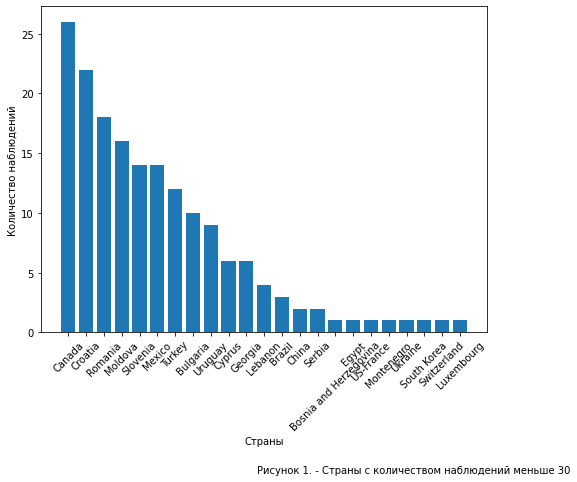

In [59]:
country_rows = df.country.value_counts()
country_rows = country_rows[country_rows<30]
plt.figure(figsize=(8,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Страны')
plt.xticks(rotation = 45)
plt.bar(country_rows.index.to_list(), country_rows.values)
plt.figtext(0.5, -0.2, "Рисунок 1. - Страны с количеством наблюдений меньше 30")

In [60]:
print("Количество записей стран c небольшим количеством данных %d, что составляет %.2f %% от всей выборки" % \
     (len(country_rows.index.to_list()), (len(country_rows.index.to_list())/len(df))*100))

Количество записей стран c небольшим количеством данных 23, что составляет 0.11 % от всей выборки


Принимаем решение об их удалении

In [61]:
df = df.query("country not in @country_rows.index")

В выборке остались страны с количеством наблюдений больше 30

Text(0.5, 0, 'Рисунок 2. - Страны в датафрейме для исследования')

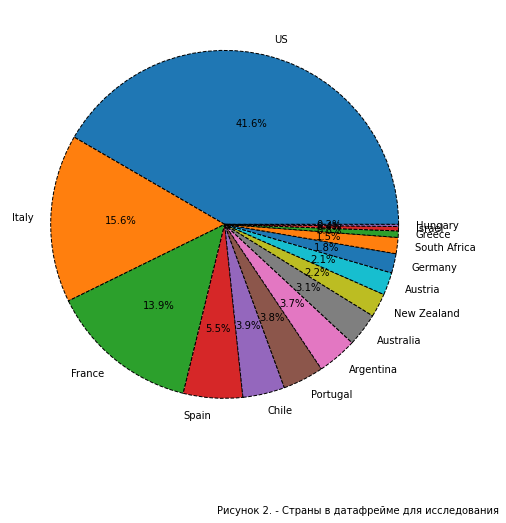

In [62]:
country = df.country.value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(np.round(country.values*100,1), labels=country.index, autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 2. - Страны в датафрейме для исследования")

По итогам исследования признака 'country' было удалено 23 записи для стран с количеством наблюдений меньше 30. В оставшемся
датафрейме почти половина наблюдений относится к США - 41.6%. Неплохая выборка по Италии - 15.6% и Франции - 13.9%. По остальным странам наблюдений значительно меньше. 

##### Points

Признак points является числовым и не имеет пропущенных значений. Отражает оценки критиков по винам

In [63]:
df.points.describe().T

count    19828.000000
mean        87.916431
std          3.240783
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

Среднее значение 87.9 практически совпадает с медианой 88. Посмотрим на распределение

Text(0.5, 0, 'Рисунок 3. - Распределение признака points')

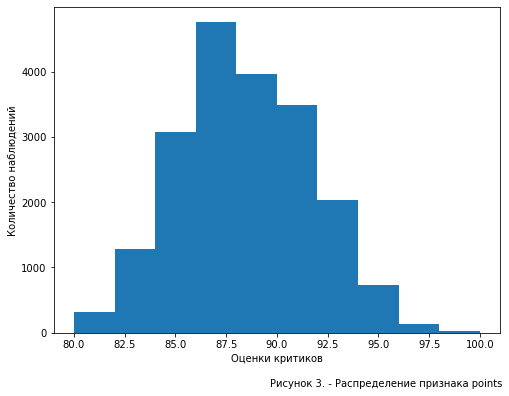

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df.points)
plt.ylabel('Количество наблюдений')
plt.xlabel('Оценки критиков')
plt.figtext(0.5, 0, "Рисунок 3. - Распределение признака points")

Распределение не совсем нормальное, имеет длинный хвост справа. Посмотрим по странам с помощью графика "ящик с усами"

Text(0.5, 0, 'Рисунок 4. - Размах признака points по странам')

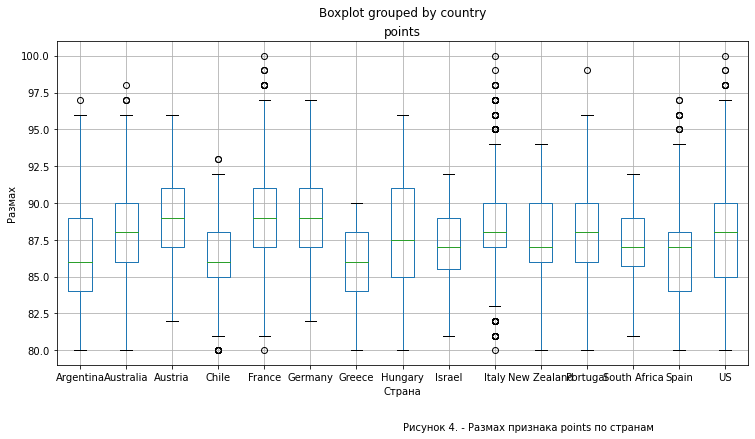

In [64]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='country', column='points', figsize=(12,6))
plt.ylabel('Размах')
plt.xlabel('Страна')
plt.figtext(0.5, 0, "Рисунок 4. - Размах признака points по странам")

Оценки для Франции, Италии, Испании имеют очевидные выбросы, которые влияют на распределение признака. Посмотрим сколько таких наблюдений 

In [65]:
def calc_quantile(country):
    q_1 = df.query("country == @country").points.quantile(0.25)
    q_3 = df.query("country == @country").points.quantile(0.75)
    iqr = q_3 - q_1
    up_level = q_3 + 1.5 * iqr
    down_level = q_1 - 1.5 * iqr
    return down_level, up_level

In [66]:
country = df.country.value_counts()
row_index = []
sum_row = 0
for x in country.index:
    down_level, up_level = calc_quantile(x)
    lst = df.query("country == @x and (points < @down_level or points > @up_level)").index.to_list()
    row_index = row_index + df.query("country == @x and (points < @down_level or points > @up_level)").index.to_list()
    sum_row = sum_row + len(lst)

In [67]:
print("Количество записей с выбросом по признаку points - %d, что составляет %.2f %% от всей выборки" % \
     (sum_row, (sum_row/len(df))*100))

Количество записей с выбросом по признаку points - 131, что составляет 0.66 % от всей выборки


Принимаем решение об удалении этих записей

In [68]:
for ind in row_index:
    df.drop(ind, axis=0, inplace=True)

Проверим распределение признака и размах

Text(0.5, 0, 'Рисунок 5. - Распределение признака points после устранения выбросов')

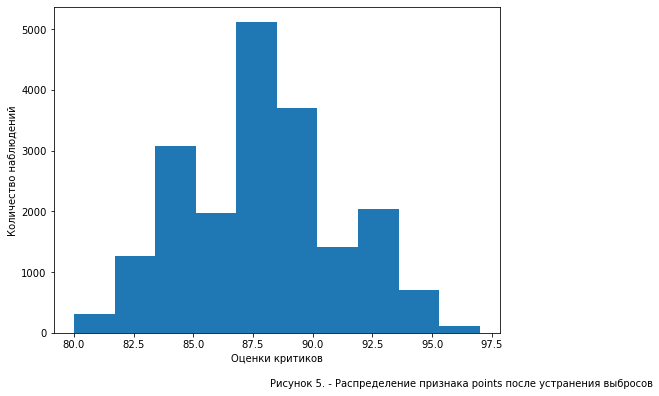

In [69]:
plt.figure(figsize=(8,6))
plt.hist(df.points)
plt.ylabel('Количество наблюдений')
plt.xlabel('Оценки критиков')
plt.figtext(0.5, 0, "Рисунок 5. - Распределение признака points после устранения выбросов")

Text(0.5, 0, 'Рисунок 6. - Размах признака points по странам после устранения выбросов')

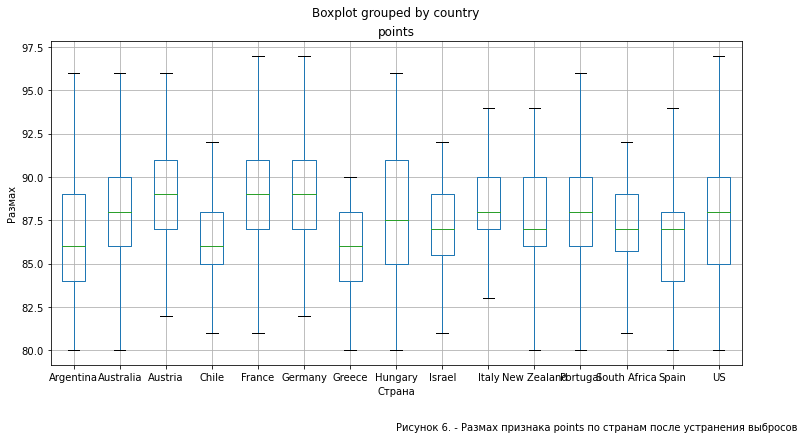

In [70]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='country', column='points', figsize=(12,6))
plt.ylabel('Размах')
plt.xlabel('Страна')
plt.figtext(0.5, 0, "Рисунок 6. - Размах признака points по странам после устранения выбросов")

По итогам исследования признака 'points' была удалена 131 запись с выбросами. Итоговое распределение признака стало ближе к нормальному

##### Price
Признак price является числовым и имеет 1774 пропущенных значения. Отражает стоимость бутылки вина

In [71]:
df.price.isnull().sum()

1774

Заменим пропущенные цены медианными значениями вин аналогичными названиями

In [72]:
df['price'] = df.groupby(['variety'])['price'].apply(lambda x: x.fillna(x.median()))

In [73]:
df.price.isnull().sum()

16

Осталось 16 пропущенных значений, которые можно без проблем удалить

In [74]:
df = df[df['price'].notnull()]

Посмотрим на распределение признака

In [75]:
df.price.describe()

count    19681.000000
mean        32.086708
std         30.879262
min          5.000000
25%         16.000000
50%         24.000000
75%         40.000000
max       1100.000000
Name: price, dtype: float64

Среднее значение 32 сильно отличается от медианного 24

Text(0.5, 0, 'Рисунок 7. - Распределение признака price')

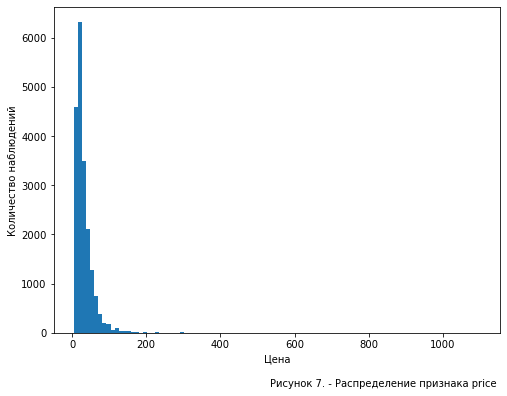

In [44]:
plt.figure(figsize=(8,6))
plt.hist(df.price, bins=100)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, 0, "Рисунок 7. - Распределение признака price")

Text(0.5, 0, 'Рисунок 8. - Размах признака price по странам')

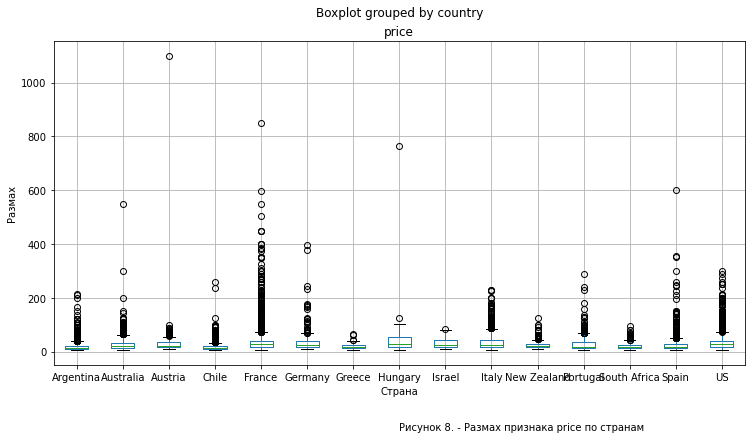

In [76]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='country', column='price', figsize=(12,6))
plt.ylabel('Размах')
plt.xlabel('Страна')
plt.figtext(0.5, 0, "Рисунок 8. - Размах признака price по странам")

Выбросов много и распространены они не равномерно по странам. Выполним процедуру удаления выбросов так же, как это было сделано с признаком points

In [77]:
def calc_quantile_price(country):
    q_1 = df.query("country == @country").price.quantile(0.25)
    q_3 = df.query("country == @country").price.quantile(0.75)
    iqr = q_3 - q_1
    up_level = q_3 + 1.5 * iqr
    down_level = q_1 - 1.5 * iqr
    return down_level, up_level

In [78]:
country = df.country.value_counts()
row_index = []
sum_row = 0
for x in country.index:
    down_level, up_level = calc_quantile_price(x)
    lst = df.query("country == @x and (price < @down_level or price > @up_level)").index.to_list()
    row_index = row_index + df.query("country == @x and (price < @down_level or price > @up_level)").index.to_list()
    sum_row = sum_row + len(lst)

In [79]:
print("Количество записей с выбросом по признаку price - %d, что составляет %.2f %% от всей выборки" % \
     (sum_row, (sum_row/len(df))*100))

Количество записей с выбросом по признаку price - 1300, что составляет 6.61 % от всей выборки


6.6 % выборки не критично, принимаем решение об удалении этих записей

In [80]:
df = df.query("index not in @row_index")


Text(0.5, 0, 'Рисунок 9. - Распределение признака price после удаления выбросов')

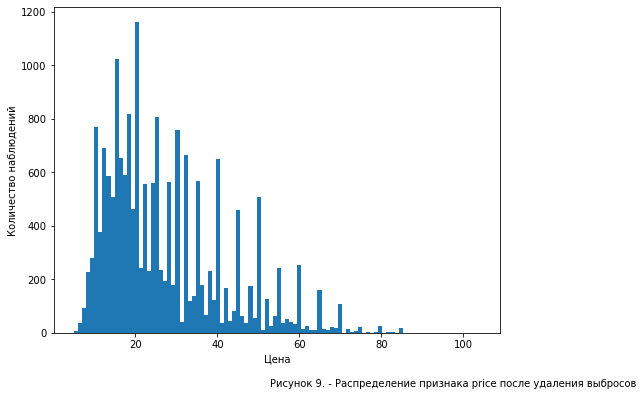

In [81]:
plt.figure(figsize=(8,6))
plt.hist(df.price, bins=100)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, 0, "Рисунок 9. - Распределение признака price после удаления выбросов")

Text(0.5, 0, 'Рисунок 10. - Размах признака price по странам после удаления выбросов')

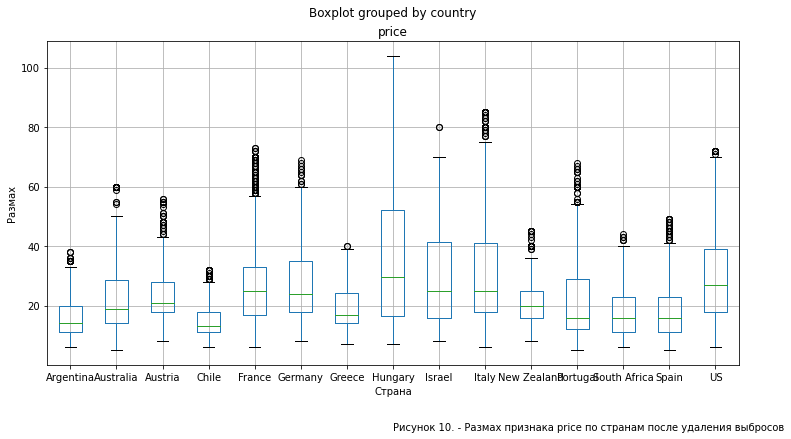

In [82]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='country', column='price', figsize=(12,6))
plt.ylabel('Размах')
plt.xlabel('Страна')
plt.figtext(0.5, 0, "Рисунок 10. - Размах признака price по странам после удаления выбросов")

In [83]:
df.price.describe()

count    18381.000000
mean        26.815870
std         14.597375
min          5.000000
25%         16.000000
50%         23.000000
75%         35.000000
max        104.000000
Name: price, dtype: float64

Картина распределения стала значительно лучше. Попробуем разбить вино на 3 категории:
    - ниже 'mean - std' - дешевое
    - выше 'mean - std' и 'mean + std' - среднее по цене
    - выше 'mean + std' дорогое

In [84]:
def price_category(price):
    down_level = 26.82 - 14.6
    up_level = 26.82 + 14.6
    if price <= down_level: 
        return 1     
    elif price > down_level and price <= up_level:  
        return 2     
    else: return 3


In [85]:
df['price_category'] = df['price'].apply(price_category)

In [86]:
df.head()

,country,points,price,province,region_1,variety,winery,price_category
0,US,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,2
2,France,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,2
4,US,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,2
6,US,84,40.0,California,Paso Robles,Bordeaux-style Red Blend,Pear Valley,2
7,US,93,40.0,California,Santa Barbara County,Syrah,Mulvane Wine Co.,2


Text(0.5, 0, 'Рисунок 10. - Распределение признака price для категории Дешевое вино')

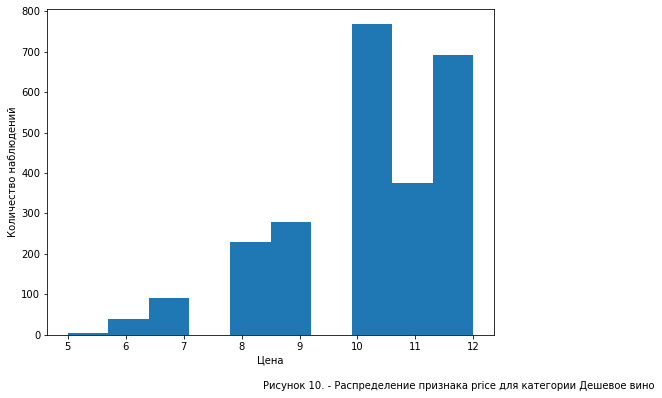

In [87]:
plt.figure(figsize=(8,6))
plt.hist(df.query("price_category == 1")['price'], bins=10)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, 0, "Рисунок 10. - Распределение признака price для категории Дешевое вино")

Text(0.5, 0, 'Рисунок 11. - Распределение признака price для Средней ценовой категории')

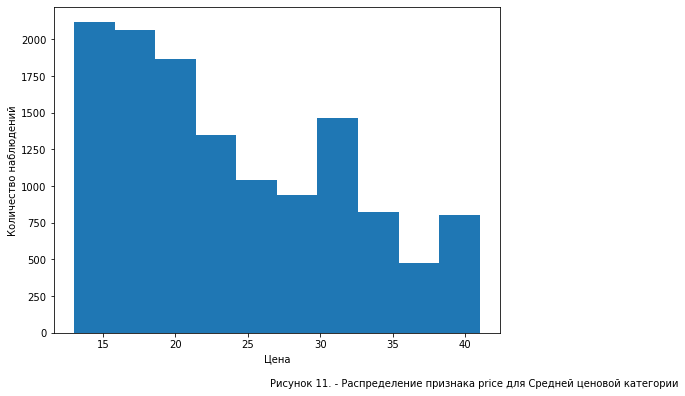

In [88]:
plt.figure(figsize=(8,6))
plt.hist(df.query("price_category == 2")['price'], bins=10)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, 0, "Рисунок 11. - Распределение признака price для Средней ценовой категории")

Text(0.5, 0, 'Рисунок 12. - Распределение признака price для категории Дорогое вино')

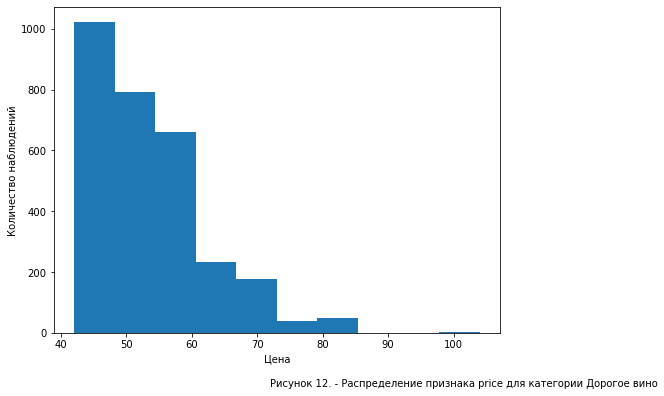

In [89]:
plt.figure(figsize=(8,6))
plt.hist(df.query("price_category == 3")['price'], bins=10)
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, 0, "Рисунок 12. - Распределение признака price для категории Дорогое вино")

По итогам исследования признака 'price':
    - заполнено 1774 пропущенных значений медианными значениями цен вин с аналогичными названиями
    - удалены оставшиеся 16 значений
    - удалено 1300 записей с выбросами. 
Итоговое распределение признака после этих действий стало значительно ближе к нормальному
Так же добавлен еще один числовой признак: 'price_category', который делит вино на дешевое, дорогое и средней стоимости

##### Province
Признак price является текстовым. Отражает регион происхождения винограда для производства вина

In [95]:
df.province.isnull().sum()

0

Пропущенных значений нет

##### Region_1
Признак region_1 является текстовым. Отражает дополнительную локализацию происхождения винограда для производства вина

In [96]:
df.region_1.isnull().sum()

3065

3065 значений пропущено. Данный признак не предполагается использовать в исследовании. Удалим его

In [90]:
del df['region_1']

##### Variety
Признак variety является текстовым. Название вина

In [91]:
df.variety.isnull().sum()

0

Пропущеных значений нет. Количество наименований вина в выборке

In [92]:
df.variety.value_counts()

Chardonnay                  1786
Pinot Noir                  1756
Cabernet Sauvignon          1355
Red Blend                   1168
Bordeaux-style Red Blend     849
                            ... 
Susumaniello                   1
Schiava                        1
Neuburger                      1
Garnacha-Cabernet              1
Mansois                        1
Name: variety, Length: 377, dtype: int64

Всего в выборке 377 наименований вина, но некоторые встречаются по 1 разу. Посмотрим сколько наименований встречаются менее 30 раз

In [93]:
name_rows = df.variety.value_counts()
name_rows = name_rows[name_rows<30]
print("Количество записей для вин c небольшим количеством данных %d, что составляет %.2f %% от всей выборки" % \
     (len(name_rows.index.to_list()), (len(name_rows.index.to_list())/len(df))*100))

Количество записей для вин c небольшим количеством данных 318, что составляет 1.73 % от всей выборки


То есть практически половина наименований в выборке встречаются редко, а их общий процент меньше 2 от всего набора данных. Удалим эти записи

In [94]:
df = df.query("variety not in @name_rows.index")

Топ 10 вин в нашем наборе данных

Text(0.5, -0.2, 'Рисунок 13. - Топ-10 наименований вина в выборке')

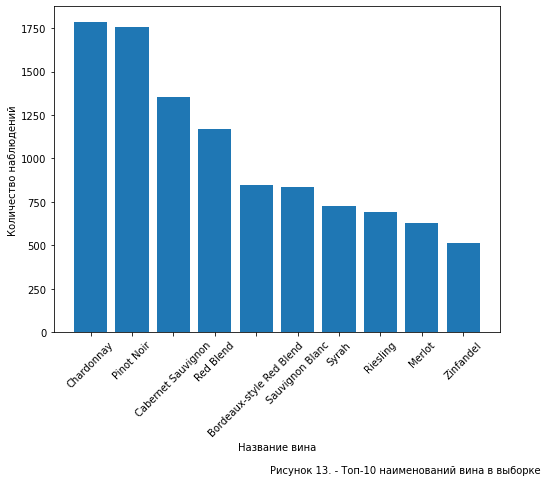

In [95]:
top_wine = df.variety.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.bar(top_wine.index.to_list(), top_wine.values)
plt.figtext(0.5, -0.2, "Рисунок 13. - Топ-10 наименований вина в выборке")

Скорее всего, предпочтения жителей разных стран будут отличаться. 

Text(0.5, -0.2, 'Рисунок 14. - Топ-10 во Франци, Италии, США')

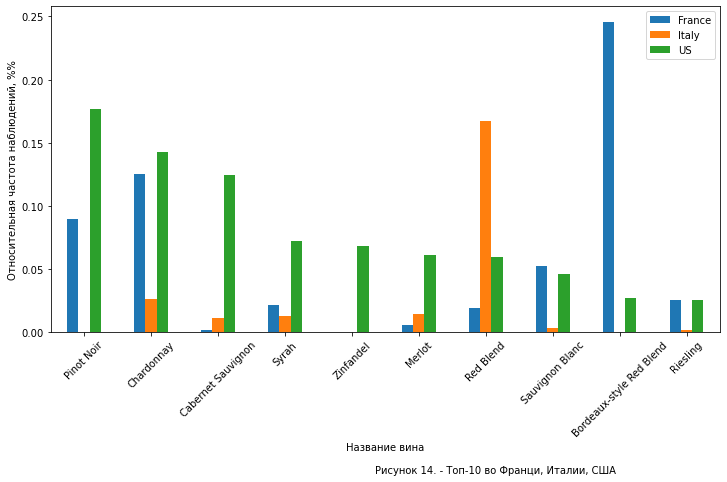

In [96]:
top_wine_any = df.query("country == 'France' or country == 'Italy' or country == 'US'")
top_wine_any = top_wine_any.pivot_table(index='variety', columns='country', values='price', aggfunc='count')
top_wine_any.columns = ['France', 'Italy', 'US']
top_wine_any.sort_values(by='US', inplace=True, ascending=False)
top_wine_any = top_wine_any.fillna(1)
top_wine_any['US'] = top_wine_any['US']/top_wine_any['US'].sum()
top_wine_any['France'] = top_wine_any['France']/top_wine_any['France'].sum()
top_wine_any['Italy'] = top_wine_any['Italy']/top_wine_any['Italy'].sum()
top_wine_any = top_wine_any.head(10)
top_wine_any.plot(kind='bar', figsize=(12,6))
plt.ylabel('Относительная частота наблюдений, %%')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 14. - Топ-10 во Франци, Италии, США")

Таким образом, ассортимент интернет-магазина вина должен отличаться для разных стран.
Кроме того, вряд ли массовый потребитель хорошо ориентируется в сотнях наименований вин. 
Добавим дополнительный категориальный признак 'color', со значениями:
    - red
    - white
    - other

In [97]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
}

In [98]:
df['color']= df['variety'].map(color)

In [99]:
df['color'] = df['color'].fillna("other")

По итогам исследования признака 'variety':
    - удалено 318 записей c наименованием вина, которое встречается в выборке менее 30 раз
    - добавлен новый категориальный признак 'color', позволяющий разделить выборку по цвету вина на 3 категории

##### Winery
Признак winery является текстовым. Содержит наименование производителя вина. Пропущенных значений не имеет

Удалим дубликаты

In [100]:
df=df.drop_duplicates(keep=False)

Итак, по результатам 1-го этапа получился датафрейм для дальнейших исследований.

In [101]:
df.head()

,country,points,price,province,variety,winery,price_category,color
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,red
4,US,83,25.0,Oregon,Pinot Noir,Deer Creek,2,red
7,US,93,40.0,California,Syrah,Mulvane Wine Co.,2,red
8,US,93,44.0,California,Pinot Noir,Piro,3,red
9,US,85,35.0,California,Merlot,Simaine Cellars,2,red


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14415 entries, 2 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         14415 non-null  object 
 1   points          14415 non-null  int64  
 2   price           14415 non-null  float64
 3   province        14415 non-null  object 
 4   variety         14415 non-null  object 
 5   winery          14415 non-null  object 
 6   price_category  14415 non-null  int64  
 7   color           14415 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1013.6+ KB


Сохраним его в файл, для дальнейшей работы с ним

In [103]:
df.to_csv('wine_reviews_correct.csv')

##### Итоги 1-го этапа
В исходном файле с данными было 20000 строк и 10 столбцов.
Были изучены все признаки и предприняты следующие действия:
    - признак 'country'. Удалено 23 записи для стран с количеством наблюдений меньше 30
    - признак 'points'. Удалена 131 запись с выбросами. Итоговое распределение признака стало ближе к нормальному
    - признак 'price':
        - заполнено 1774 пропущенных значений медианными значениями цен вин с аналогичными названиями
        - удалены оставшиеся 16 значений
        - удалено 1300 записей с выбросами. Итоговое распределение признака стало ближе к нормальному
        - добавлен еще один числовой признак: 'price_category', который делит вино на дешевое, дорогое и средней стоимости
    - признак 'Region_1' - 3065 значений пропущено. Данный признак не предполагается использовать в исследовании. Удален
    - признак 'variety':
        - удалено 318 записей c наименованием вина, которое встречается в выборке менее 30 раз
        - добавлен новый категориальный признак 'color', позволяющий разделить выборку по цвету вина на 3 категории
После внесения изменений и удаления дубликатов осталось 14415 наблюдений в выборке, или 72% от исходных данных.
<br>
<br>
<br>


###  <a name="2">2. Исследовательский анализ данных</a>
На данном этапе проведем исследование рынка вина в целом:

1. Цены:
     - Найдем минимальную, максимальную и среднюю цену вина для каждой страны. Интересно выяснить в какой стране вина доступнее всего для потребителей
     - Определим какие винодельни производят самые дорогие вина
     - Определим какие винодельни производят самые дешевые вина	

2. Рейтинг:
    - Найдем топ-10 вин по рейтингу в общей выборке	
    - Построим график «ящик с усами» по рейтингам в разбивке по странам. Страны с высоким рейтингом, видимо, можно отнести к странам с высоким потреблением, там гдерейтинг ниже, возможно предпочитают другие напитки
    - Построим график цены вина с максимальным рейтингом по странам. Интересно где доступнее всего качественное вино
    - Построим график «ящик с усами» по рейтингам в разбивке по названиям вин. Рейтинг должен отражать качество вина
    - Найдем топ-10 вин с самым низким рейтингом
    - Сделаем то же самое для одной страны, например Франции, где располагается наш теоретический интернет-магазин вина. Результаты должны отличаться от исследований на общей выборке
    - Скорее всего существует зависимость между рейтингом и ценой вина. Сделаем график рассеяния и рассчитаем корреляцию для всей выборки. 
    - Построим график рассеяния и рассчитаем корреляцию для категорий: дешевое, дорогое и среднее по цене вино. Интересно сравнить результаты
    - Аналогично, для одной страны - Франции
    - Интересно так же узнать области происхождения винограда (province) для топ-10 вин по рейтингу
    - Выясним в какой части мира производят вина с более высоким рейтингом
    - Определим какие винодельни производят вина с самым высоким рейтингом	
    - Определим какие винодельни производят вина с самым низким рейтингом		

3. Сорт(название) вина:
    - Найдем топ-10 сортов вин по потреблению в общей выборке
    - Найдем топ-10 сортов вин по стоимости в общей выборке		
    - Посмотрим в каких странах предпочитают красное вино, а в каких белое
    - Сделаем то же самое для одной страны, например Франции, где располагается наш теоретический интернет-магазин вина. Результаты должны отличаться от исследований на общей выборке

Загружаем, подготовленный на этапе 1, датафрейм

In [104]:
df = pd.read_csv('wine_reviews_correct.csv', index_col = 0)
df.head()

,country,points,price,province,variety,winery,price_category,color
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,red
4,US,83,25.0,Oregon,Pinot Noir,Deer Creek,2,red
7,US,93,40.0,California,Syrah,Mulvane Wine Co.,2,red
8,US,93,44.0,California,Pinot Noir,Piro,3,red
9,US,85,35.0,California,Merlot,Simaine Cellars,2,red


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14415 entries, 2 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         14415 non-null  object 
 1   points          14415 non-null  int64  
 2   price           14415 non-null  float64
 3   province        14415 non-null  object 
 4   variety         14415 non-null  object 
 5   winery          14415 non-null  object 
 6   price_category  14415 non-null  int64  
 7   color           14415 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1013.6+ KB


##### Цены
Найдем минимальную, максимальную и среднюю цену вина для каждой страны. Интересно выяснить в какой стране вина доступнее всего для потребителей

Text(0.5, -0.2, 'Рисунок 15. - Цены на вино по странам')

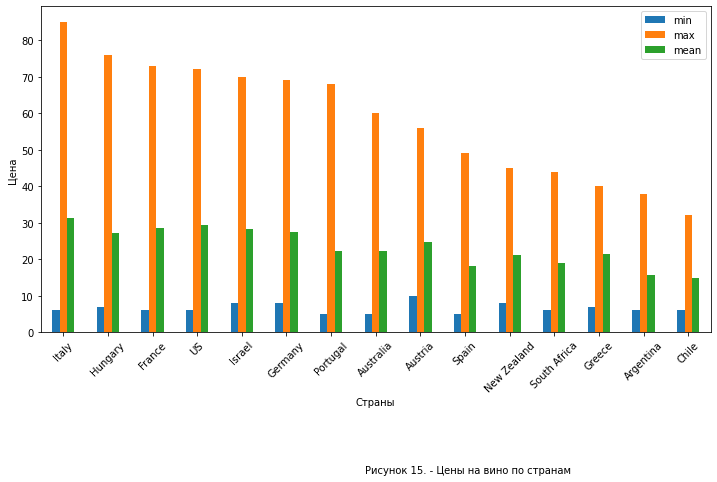

In [106]:
country_stat = df.pivot_table(index='country', values='price', aggfunc=['min', 'max', 'mean'])
country_stat.columns = ['min', 'max', 'mean']
country_stat.sort_values(by='max', ascending=False, inplace=True)
country_stat.plot(kind='bar', figsize=(12,6))
plt.ylabel('Цена')
plt.xlabel('Страны')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 15. - Цены на вино по странам")

Больше всего за вино приходится платить в европейских странах: Италия, Венгрия, Франция. Дешевле всего вино в странах Южной Америки: Аргентина, Чили. Наверное, можно обьяснить это величиной акциза на вино. В странах с высоким уровнем жизни он выше, с низким уровнем - ниже. Германия и Австрия относится к странам с высоким уровнем, но там есть альтернативный напиток - пиво. 

Винодельни, которые производят самые дорогие вина

In [107]:
price_winery = df.groupby(['winery', 'country'])['price'].max().sort_values(ascending = False)
price_winery.head(5)

winery        country
G D Vajra     Italy      85.0
Capannelle    Italy      85.0
Ca' Marcanda  Italy      85.0
Speri         Italy      85.0
Il Palazzone  Italy      85.0
Name: price, dtype: float64

In [ ]:
Пятерка производителей самого дорогого вина находится в Италии, что неудивительно, так как там самые высокие цены

In [ ]:
Винодельни, которые производят самые дешевые вина

In [108]:
price_winery.tail(5)

winery           country  
Abrazo           Spain        5.0
Banrock Station  Australia    5.0
Kelly's Revenge  Australia    5.0
Viña Decana      Spain        5.0
Campelo          Portugal     5.0
Name: price, dtype: float64

Производители самого дешевого вина расположены в Испании, Португалии и Австралии. Эти страны не относятся к супер-дешевым с точки зрения цен на напиток. Предполагаю, что это какие-то крупные производители, которые поставляют много вина на экспорт. 

##### Рейтинг
Выберем топ-10 вин с самым высоким рейтингом из общей выборки

Text(0.5, -0.2, 'Рисунок 16. - Топ-10 наименований вин с самым высоким рейтингом')

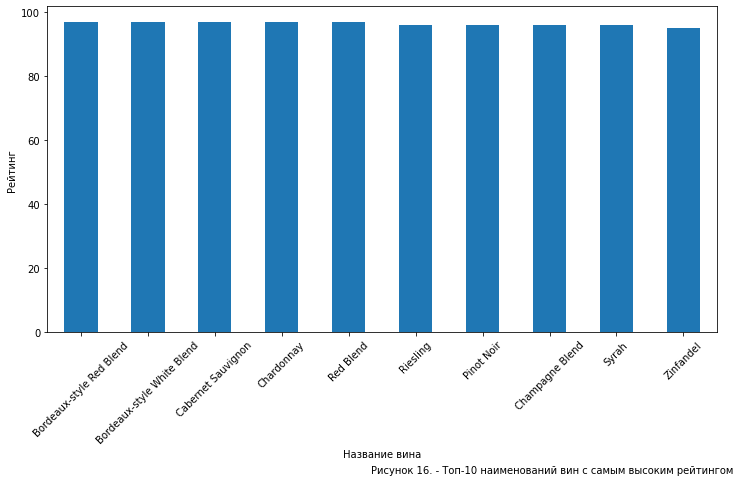

In [109]:
raiting = df.groupby('variety')['points'].max().sort_values(ascending = False)
raiting.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Рейтинг')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 16. - Топ-10 наименований вин с самым высоким рейтингом")

Сразу посмотрим на топ-10 самых дешевых вин
<br>
<br>
<br>

Text(0.5, -0.2, 'Рисунок 17. - Топ-10 наименований вин с самым низким рейтингом')

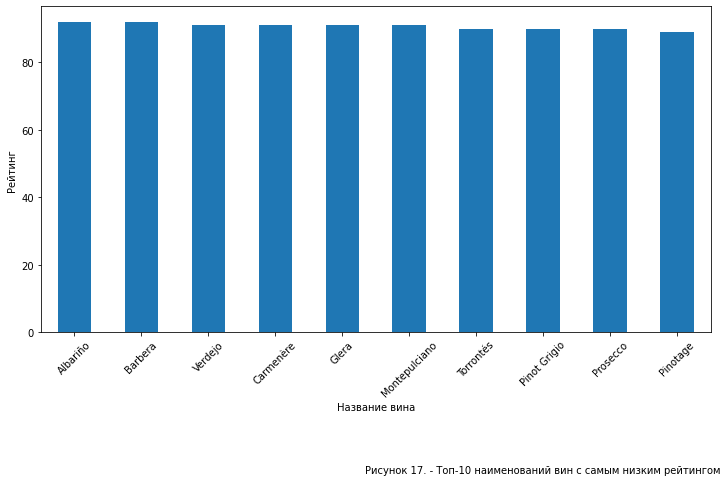

In [110]:
raiting.tail(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Рейтинг')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 17. - Топ-10 наименований вин с самым низким рейтингом")

Построим график «ящик с усами» по рейтингам в разбивке по странам

Text(0.5, -0.2, 'Рисунок 18. - Рейтинг вин по странам')

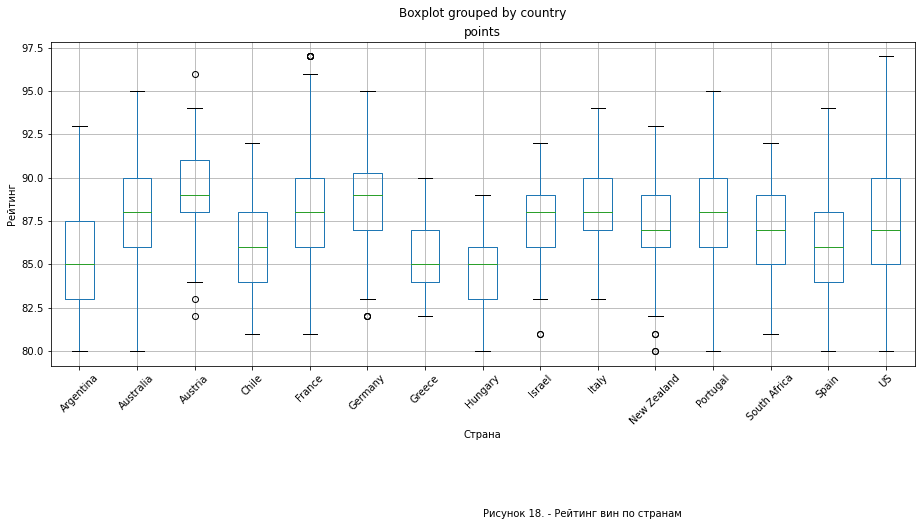

In [111]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='country', column='points', figsize=(15,6))
plt.ylabel('Рейтинг')
plt.xlabel('Страна')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 18. - Рейтинг вин по странам")

Самые низкие оценки ставят жители Венгрии. Так же невысоко оценивают вино в Аргентине и Чили. Выше всего ценят вино в Германии и Австрии. Причиной этого может быть восприятие его как премиального напитка, так как в оновном население употребляет пиво

In [112]:
raiting_price = df.pivot_table(index='country', columns='points', values='price', aggfunc='max').fillna(0)        

Text(0.5, -0.2, 'Рисунок 20. - Цены на вино с самым высоким рейтингом по странам')

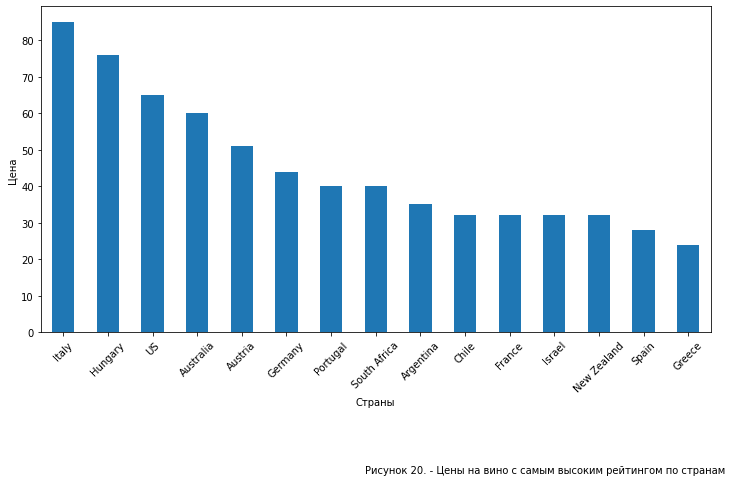

In [113]:
max_price = []
for x in raiting_price.index:
    row = raiting_price.loc[x]
    for y in reversed(row.values):
        if y != 0:
            max_price.append(y)
            break
                     
raiting_price['max_price'] = max_price
raiting_price.sort_values(by='max_price', ascending=False, inplace=True)

raiting_price.max_price.plot(kind='bar', figsize=(12,6))
plt.ylabel('Цена')
plt.xlabel('Страны')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 20. - Цены на вино с самым высоким рейтингом по странам")

Дешевле всего выпить вина с высоким рейтингом в Греции, Испании. Кроме того, и во Франции можно найти дешевое по цене вино с очень высоким рейтингом
Построим график «ящик с усами» по рейтингам в разбивке по сортам вина

Text(0.5, 0, 'Рисунок 21. - Разброс оценок сорта вина')

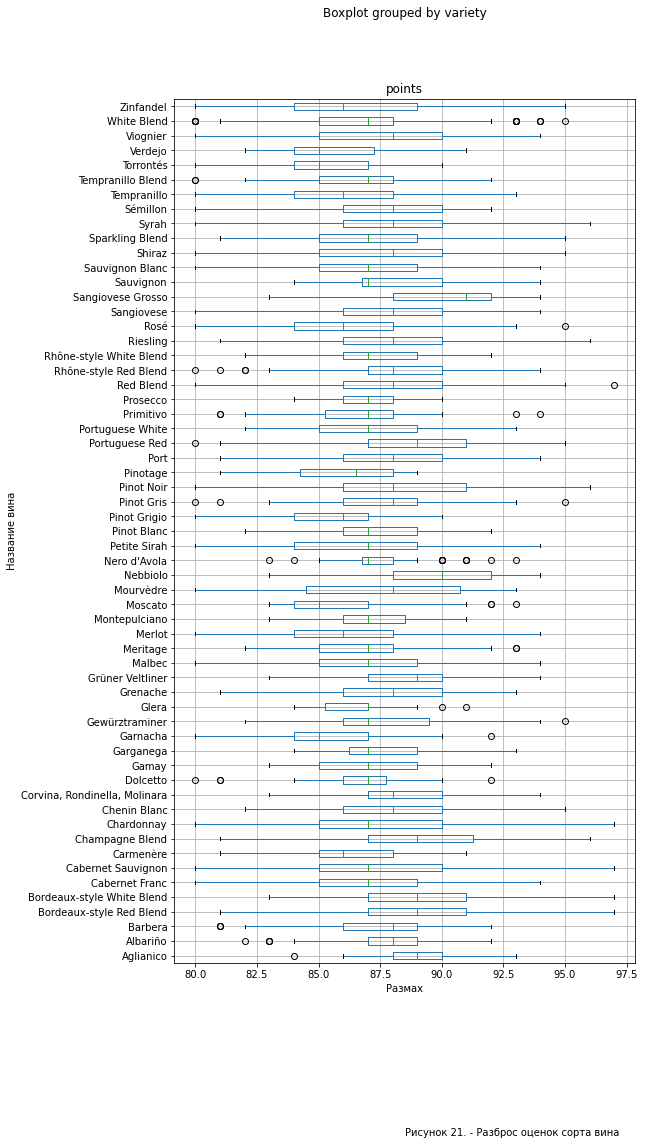

In [114]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df.boxplot(by='variety', column='points', figsize=(8,16), vert=False)
plt.ylabel('Название вина')
plt.xlabel('Размах')
plt.figtext(0.5, 0, "Рисунок 21. - Разброс оценок сорта вина")

Из диаграммы видно, что один и тот же сорт вина оценивают очень по разному. Возможно это можно использовать для извлечения прибыли от продажи вина. Покупать в странах с низкой оценкой и продавать там где она высокая. Разумеется нужно скорректировать на стоимость логистики и налоги

Все предыдущие исследования рейтинга проводились на общей выборке. Повторим их для одной страны - Франции, где расположен наш теоретический интернет-магазин вина

In [115]:
df_fr = df.query("country == 'France'")

Text(0.5, -0.2, 'Рисунок 22. - Топ-10 наименований вин с самым высоким рейтингом во Франции')

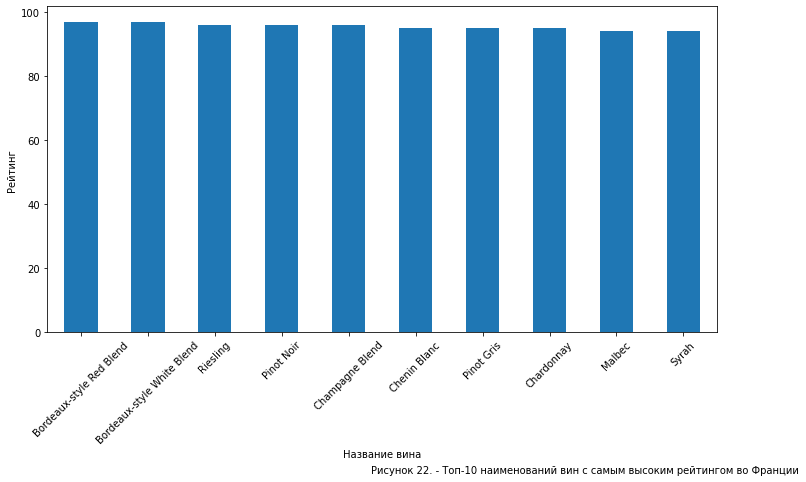

In [116]:
raiting = df_fr.groupby('variety')['points'].max().sort_values(ascending = False)
raiting.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Рейтинг')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 22. - Топ-10 наименований вин с самым высоким рейтингом во Франции")

Как и ожидалось, топ-10 изменился, по сравнению с общей выборкой. Первые 2 наименования такие же, остальные или новые или изменили место

Топ-10 самых дешевых вин

Text(0.5, -0.2, 'Рисунок 23. - Топ-10 наименований вин с самым низким рейтингом во Франции')

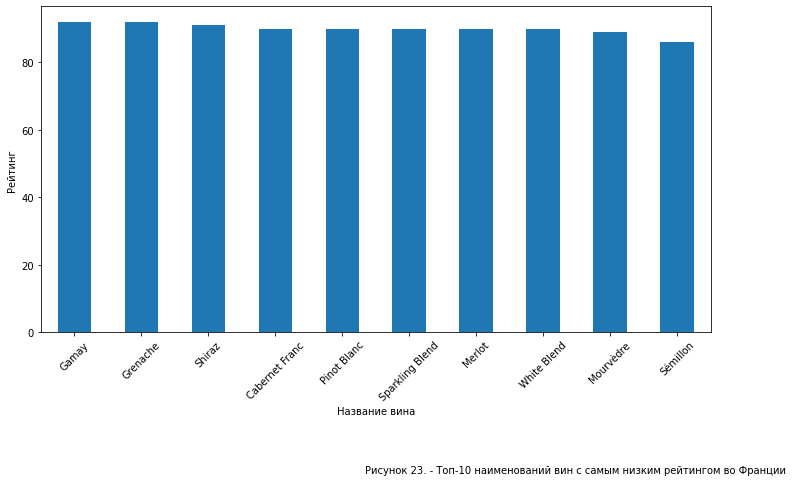

In [117]:
raiting.tail(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Рейтинг')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 23. - Топ-10 наименований вин с самым низким рейтингом во Франции")

Здесь изменился практически весь список

Построим график «ящик с усами» по рейтингам в разбивке по сортам вина

Text(0.5, 0, 'Рисунок 24. - Разброс оценок сорта вина во Франции')

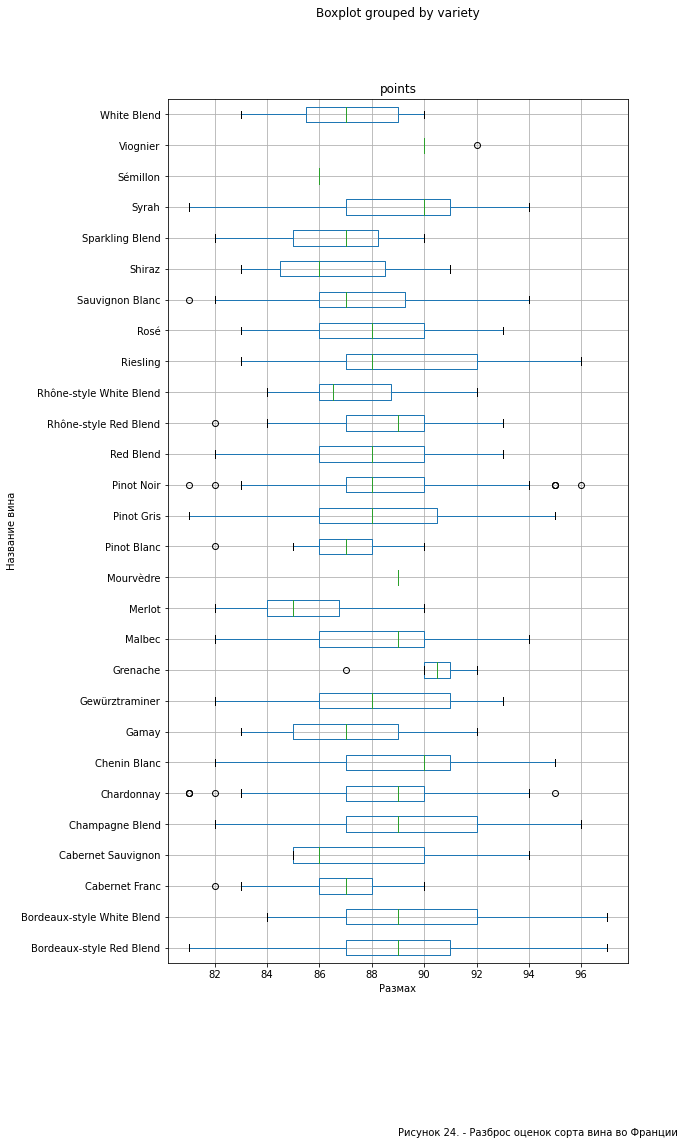

In [118]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
df_fr.boxplot(by='variety', column='points', figsize=(8,16), vert=False)
plt.ylabel('Название вина')
plt.xlabel('Размах')
plt.figtext(0.5, 0, "Рисунок 24. - Разброс оценок сорта вина во Франции")

Что интересно - максимальный разброс оценок на 2 лидера рейтинга: Bordeaux White и Bordeaux Red. В общей выборке максимальный размах был у: Chardonnay и Shiraz. Еще одно подтверждение, что ассортимент интернет-магазина будет отличаться для каждой страны

Следующим пунктом идет исследование зависимости рейтинг - цена. Сделаем это в отдельном разделе <a href=#4>Исследование зависимости цены от рейтинга</a> ниже

Выясним еще пару моментов касающихся рынка вина. Узнаем области происхождения винограда (province) для топ-10 вин по рейтингу общей выборки

In [119]:
raiting_province = df.groupby(['province', 'country'])['points'].max().sort_values(ascending = False)
raiting_province.head(10)

province    country 
Bordeaux    France      97
California  US          97
Washington  US          97
Burgundy    France      96
Champagne   France      96
Alsace      France      96
Kamptal     Austria     96
Oregon      US          95
Rheingau    Germany     95
Douro       Portugal    95
Name: points, dtype: int64

Четыре из 10 области расположены во Франции. Три в США.

Определим какие винодельни производят вина с самым высоким рейтингом

In [120]:
raiting_winery = df.groupby(['winery', 'country'])['points'].max().sort_values(ascending = False)
raiting_winery.head(10)

winery                     country
Château Rieussec           France     97
Château Lafite Rothschild  France     97
Château Haut-Brion         France     97
Château Mouton Rothschild  France     97
Redmon                     US         97
Failla                     US         97
Buty                       US         97
Château Pétrus             France     97
Samsara                    US         96
Ramey                      US         96
Name: points, dtype: int64

Тут полное соответствие области происхождения винограда. Где лучший виноград, там и лучший производитель

"Анти-рейтинг" производителей

In [121]:
raiting_winery.tail(5)

winery              country  
Stone Creek         US           80
La Puerta           Argentina    80
Guerrero Fernandez  US           80
Pacific Oasis       US           80
Idrias              Spain        80
Name: points, dtype: int64

Здесь тоже отметились США. Три из 5. Возможно какие-то молодые виноградники на этапе становления.

И, наконец, посмотрим на части света, где производят вина с максимальным рейтингом. Для этого добавим в датафрейм новый признак 'continent'

In [122]:
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}

In [123]:
df['continent']= df['country'].map(country_to_continent)
df.head()

,country,points,price,province,variety,winery,price_category,color,continent
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,red,Europe
4,US,83,25.0,Oregon,Pinot Noir,Deer Creek,2,red,North America
7,US,93,40.0,California,Syrah,Mulvane Wine Co.,2,red,North America
8,US,93,44.0,California,Pinot Noir,Piro,3,red,North America
9,US,85,35.0,California,Merlot,Simaine Cellars,2,red,North America


Text(0.5, -0.2, 'Рисунок 25. - Рейтинг вин по континетам')

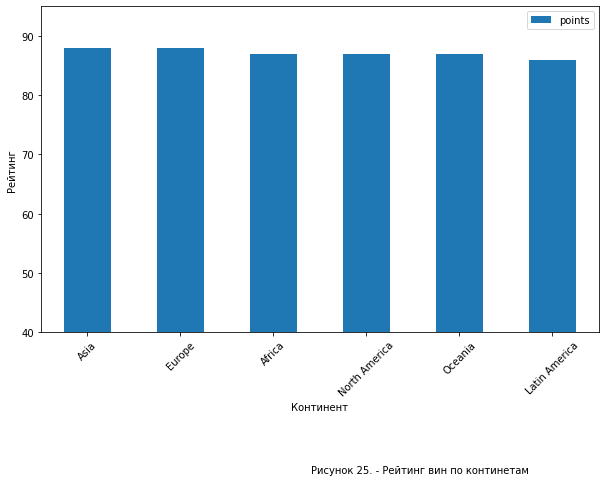

In [124]:
raiting_continent = df.pivot_table(index='continent', values='points', aggfunc='median')
raiting_continent.sort_values(by='points', ascending=False, inplace=True)
raiting_continent.plot(kind='bar', figsize=(10,6))
plt.ylabel('Рейтинг')
plt.ylim(40, 95)
plt.xlabel('Континент')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 25. - Рейтинг вин по континетам")

В лидерах рейтингов - Азия и Европа. Южная Америка на последнем месте. Картина похожа на распределение по ценам. Высокие цены на вино - высокие рейтинги, низкие цены - низкие рейтинги. 

##### Сорт вина
Выберем топ-10 вин по количеству наблюдений из общей выборки

Text(0.5, -0.2, 'Рисунок 26. - Топ-10 наименований вин по количеству наблюдений')

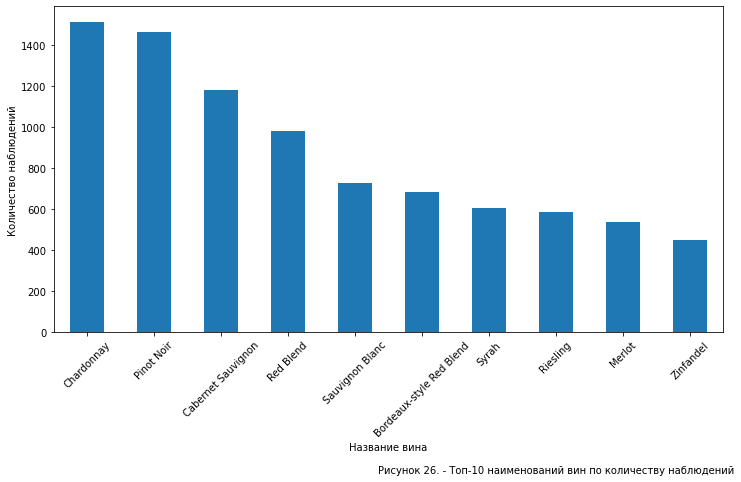

In [125]:
name_count = df.variety.value_counts().sort_values(ascending = False)
name_count.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 26. - Топ-10 наименований вин по количеству наблюдений")

Топ-10 самых дешевых вин

Text(0.5, -0.2, 'Рисунок 27. - 10 не популярных вин по количеству наблюдений')

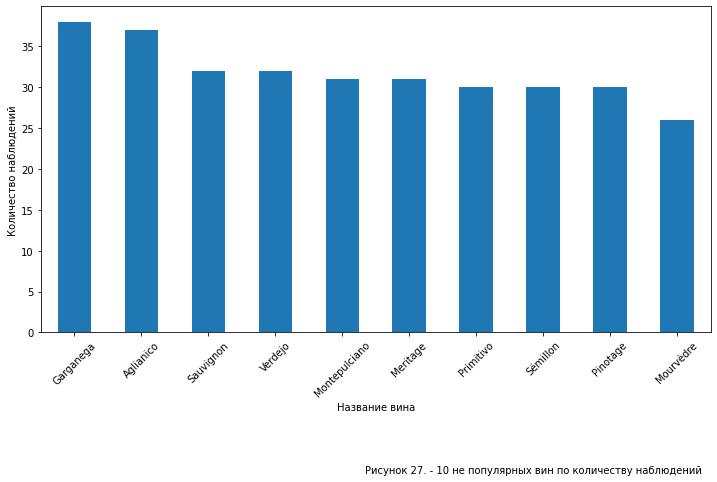

In [126]:
name_count.tail(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 27. - 10 не популярных вин по количеству наблюдений")

На 1-ом этапе была добавлена колонка 'color' с категорией "Цвет вина". Интересно, какой цвет вина предпочитают жители разных стран

In [127]:
color_wine = pd.crosstab(df['country'], df['color'], margins=True)
color_wine['w/a'] = color_wine.white / color_wine.All
color_wine['r/a'] = color_wine.red / color_wine.All
color_wine = color_wine[(color_wine['w/a'] > 0) & (color_wine['r/a'] > 0)]
print("наибольшая доля белого вина %.2f в %s" % (color_wine['w/a'].max(), color_wine['w/a'].idxmax()))
print("наибольшая доля красного вина %.2f в %s" % (color_wine['r/a'].max(), color_wine['r/a'].idxmax()))

наибольшая доля белого вина 0.96 в Germany
наибольшая доля красного вина 0.74 в Argentina


Text(0.5, 0, 'Рисунок 28. - Цвет вина по странам')

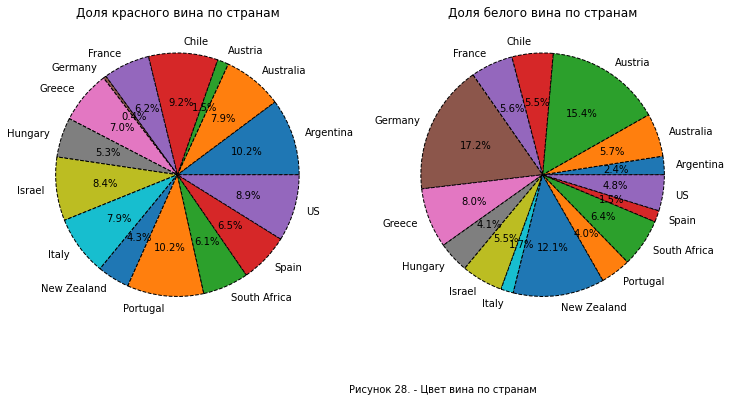

In [128]:
weight_list_red = color_wine['r/a']
weight_list_white = color_wine['w/a']
name_country = color_wine.index
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1, title='Доля красного вина по странам')
plt.pie(weight_list_red[:-1], labels=name_country[:-1], autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.subplot(1, 2, 2, title='Доля белого вина по странам')
plt.pie(weight_list_white[:-1], labels=name_country[:-1], autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 28. - Цвет вина по странам")

Все очень по разному. В Европе похоже больше предпочитают белое вино, а в Южной Америке - красное. Посмотрим как выглядит по континентам

In [129]:
color_wine = pd.crosstab(df['continent'], df['color'], margins=True)
color_wine['w/a'] = color_wine.white / color_wine.All
color_wine['r/a'] = color_wine.red / color_wine.All
color_wine = color_wine[(color_wine['w/a'] > 0) & (color_wine['r/a'] > 0)]
print("наибольшая доля белого вина %.2f в %s" % (color_wine['w/a'].max(), color_wine['w/a'].idxmax()))
print("наибольшая доля красного вина %.2f в %s" % (color_wine['r/a'].max(), color_wine['r/a'].idxmax()))

наибольшая доля белого вина 0.48 в Oceania
наибольшая доля красного вина 0.70 в Latin America


Text(0.5, 0, 'Рисунок 29. - Цвет вина по континентам')

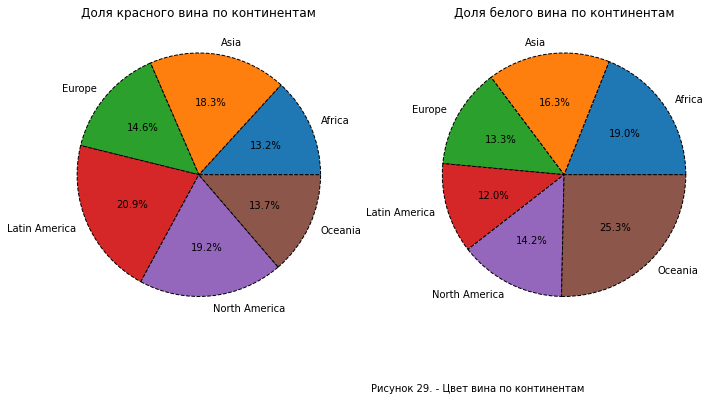

In [130]:
weight_list_red = color_wine['r/a']
weight_list_white = color_wine['w/a']
name_country = color_wine.index
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1, title='Доля красного вина по континентам')
plt.pie(weight_list_red[:-1], labels=name_country[:-1], autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.subplot(1, 2, 2, title='Доля белого вина по континентам')
plt.pie(weight_list_white[:-1], labels=name_country[:-1], autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 29. - Цвет вина по континентам")

Да, в Южной Америке однозначно предпочитают красное. А вот в Европе получилось примерно поровну.

In [ ]:
Теперь те же выкладки, но для Франции

In [131]:
df_fr = df.query("country == 'France'")

Text(0.5, -0.2, 'Рисунок 30. - Топ-10 вин по количеству наблюдений Франция')

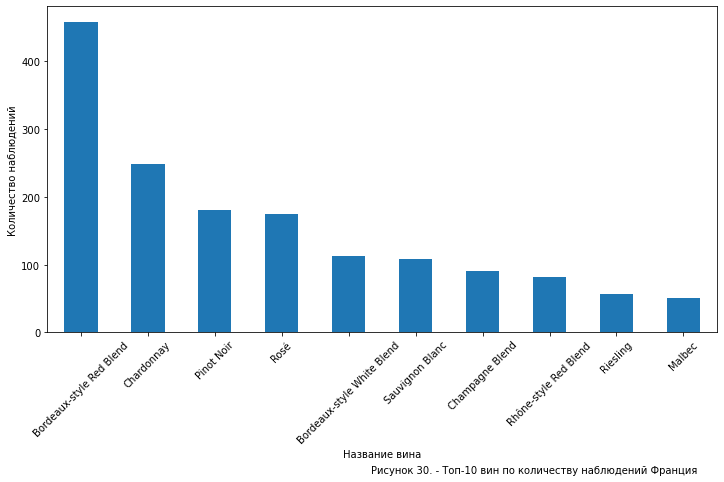

In [132]:
name_count = df_fr.variety.value_counts().sort_values(ascending = False)
name_count.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 30. - Топ-10 вин по количеству наблюдений Франция")

Рейтинг значительно отличается от рейтинга по общей выборке. Неоспоримый лидер Bordeaux Red, который в общемировом рейтинге был 6-ом месте. 

Не популярные во Франции вина. 

Text(0.5, -0.2, 'Рисунок 31. - 10 не популярных вин по количеству наблюдений Франция')

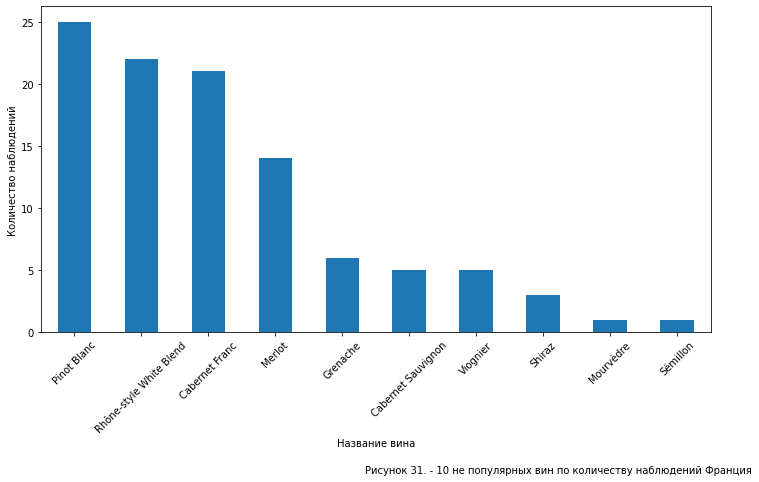

In [133]:
name_count.tail(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 31. - 10 не популярных вин по количеству наблюдений Франция")

Здесь тоже большие расхождения с мировым рейтингом
Узнаем какой цвет вина предпочитает французский потребитель

In [134]:
color_wine_fr = df_fr.color.value_counts()/len(df_fr)
color_wine_fr

red      0.450179
white    0.314768
other    0.235054
Name: color, dtype: float64

Text(0.5, 0, 'Рисунок 32. - Цвет вина для Франции')

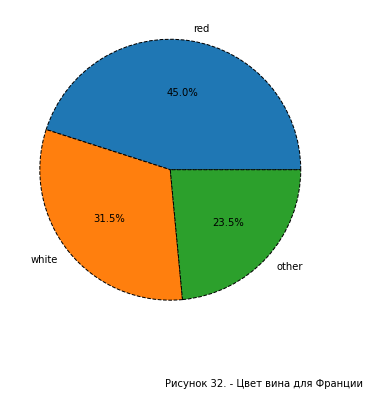

In [135]:
weight_list = color_wine_fr.values
name_labels = color_wine_fr.index
plt.figure(figsize=(6, 6))
plt.pie(weight_list, labels=name_labels, autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 32. - Цвет вина для Франции")

Во Франции больше всего любят красное вино.
Сохраним датафрейм перед следующим этапом исследования

In [136]:
df.to_csv('wine_reviews_correct_1.csv')

#### Итоги этапа 2
В процессе исследования рынка вина:
    - найдены минимальная, максимальная и средняя цена вина для каждой страны
    - определены винодельни, которые производят самые дорогие вина
    - определены винодельни, которые производят самые дешевые вина
    - определены топ-10 вин с самым высоким рейтингом
    - определены топ-10 вин с самым низким рейтингом
    - построен график «ящик с усами» по рейтингам в разбивке по странам
    - определено в каких странах вино с высоким рейтингом стоит дешевле всего
    - определены какие винодельни производят вина с самым высоким рейтингом
    - в датафрейм добавлен новый признак 'continent'
    - определено в какой части света производят вина с самым высоким рейтингом
    - определены топ-10 самых популярных вин
    - определены топ-10 самых не популярных вин
    - сделано исследование: "какой цвет вина предпочитают жители разных стран, жители разных континентов"
    - эти же исследования выполнены для отдельно взятой страны - Франции, где расположен наш теоретический интернет-магазин вина
<br>   
<br>  
<br>  

### <a name="4">3. Исследование зависимости цены от рейтинга </a>

Загружаем, сохраненный в конце 2-го этапа, датафрейм

In [137]:
df = pd.read_csv('wine_reviews_correct_1.csv', index_col = 0)
df.head()

,country,points,price,province,variety,winery,price_category,color,continent
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,red,Europe
4,US,83,25.0,Oregon,Pinot Noir,Deer Creek,2,red,North America
7,US,93,40.0,California,Syrah,Mulvane Wine Co.,2,red,North America
8,US,93,44.0,California,Pinot Noir,Piro,3,red,North America
9,US,85,35.0,California,Merlot,Simaine Cellars,2,red,North America


Посмотрим на зависимость признака price от points

Text(0.5, -0.05, 'Рисунок 33. - Зависимость цена рейтинг')

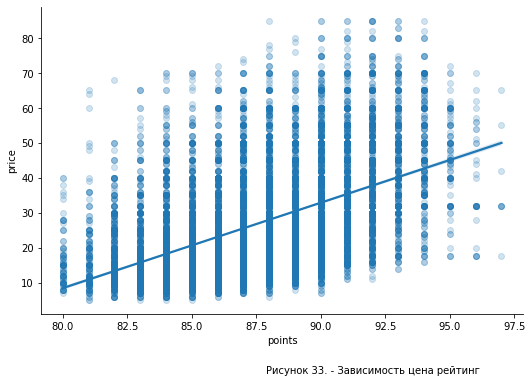

In [138]:
sns.lmplot(x='points', y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 33. - Зависимость цена рейтинг")

Попробуем использовать log признака 'price'

Text(0.5, -0.05, 'Рисунок 34. - Зависимость логарифм цены - рейтинг')

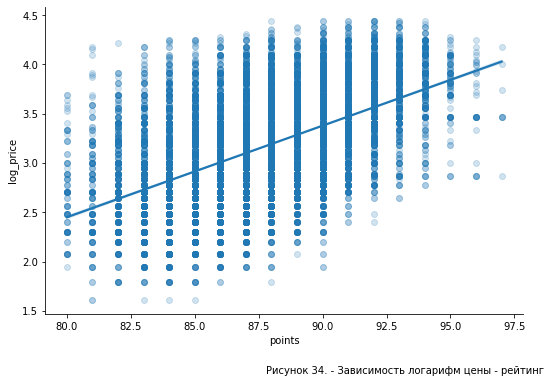

In [139]:
df['log_price'] = np.log(df['price'])
sns.lmplot(x='points', y='log_price', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 34. - Зависимость логарифм цены - рейтинг")

С логарифмом цены зависимость более наглядная.

In [140]:
print("Коэффициент корреляции между признаками log_price и points составляет %.2f" % df.points.corr(df.log_price))

Коэффициент корреляции между признаками log_price и points составляет 0.53


На 1-ом этапе исследования был введен дополнительный признак 'price_category': дешевое, дорогое и вино средней ценовой категории. Построим график зависимости цена - рейтинг и рассчитаем коэффициент корреляции для каждой категории. Будем использовать логарифм цены

Text(0.5, -0.05, 'Рисунок 35. - Зависимость логарифм цены - рейтинг для дешевых вин')

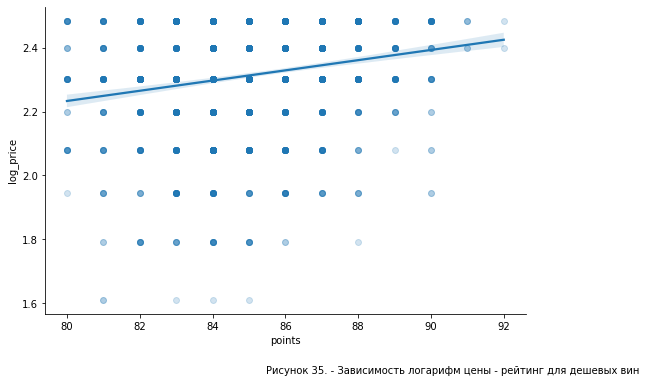

In [141]:
df_cheap_price = df.query("price_category == 1")
sns.lmplot(x='points', y='log_price', data=df_cheap_price, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 35. - Зависимость логарифм цены - рейтинг для дешевых вин")

In [142]:
print("Коэффициент корреляции между признаками log_price и points для дешевых вин составляет %.2f" % \
      df_cheap_price.points.corr(df_cheap_price.log_price))

Коэффициент корреляции между признаками log_price и points для дешевых вин составляет 0.21


Text(0.5, -0.05, 'Рисунок 36. - Зависимость логарифм цены - рейтинг для вин средней ценовой категории')

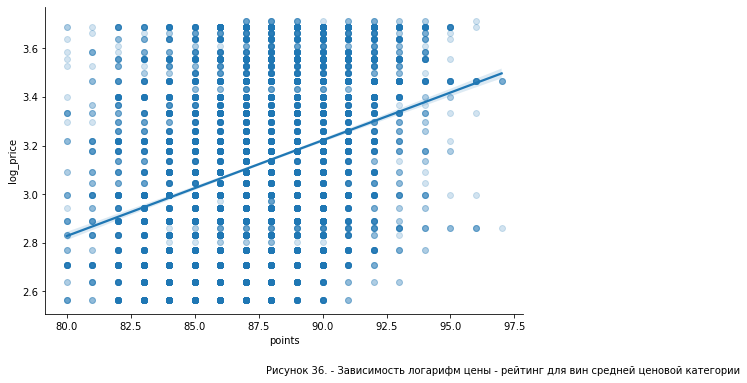

In [143]:
df_middle_price = df.query("price_category == 2")
sns.lmplot(x='points', y='log_price', data=df_middle_price, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 36. - Зависимость логарифм цены - рейтинг для вин средней ценовой категории")

In [144]:
print("Коэффициент корреляции между признаками log_price и points для вин средней ценовой категории составляет %.2f" % \
      df_middle_price.points.corr(df_middle_price.log_price))

Коэффициент корреляции между признаками log_price и points для вин средней ценовой категории составляет 0.33


Text(0.5, -0.05, 'Рисунок 37. - Зависимость логарифм цены - рейтинг для дорогих вин')

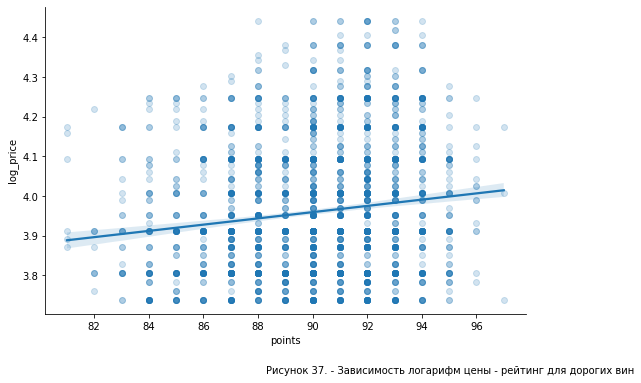

In [145]:
df_expensive_price = df.query("price_category == 3")
sns.lmplot(x='points', y='log_price', data=df_expensive_price, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 37. - Зависимость логарифм цены - рейтинг для дорогих вин")

In [15]:
print("Коэффициент корреляции между признаками log_price и points для дорогих вин составляет %.2f" % \
      df_expensive_price.points.corr(df_expensive_price.log_price))

Коэффициент корреляции между признаками log_price и points для дорогих вин составляет 0.16


Посмотрим на зависимости для отдельно взятой страны - Франции, где базируется наш интернет-магазин вина

Text(0.5, -0.05, 'Рисунок 38. - Зависимость логарифм цены - рейтинг Франция')

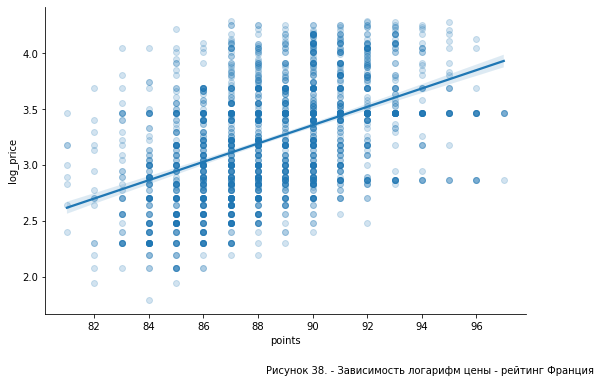

In [163]:
df_fr = df.query("country == 'France'").copy()
sns.lmplot(x='points', y='log_price', data=df_fr, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 38. - Зависимость логарифм цены - рейтинг Франция")

In [164]:
print("Коэффициент корреляции между признаками log_price и points для Франции составляет %.2f" % \
      df_fr.points.corr(df_fr.log_price))

Коэффициент корреляции между признаками log_price и points для Франции составляет 0.48


Text(0.5, -0.05, 'Рисунок 39. - Зависимость логарифм цены - рейтинг для дешевых вин Франция')

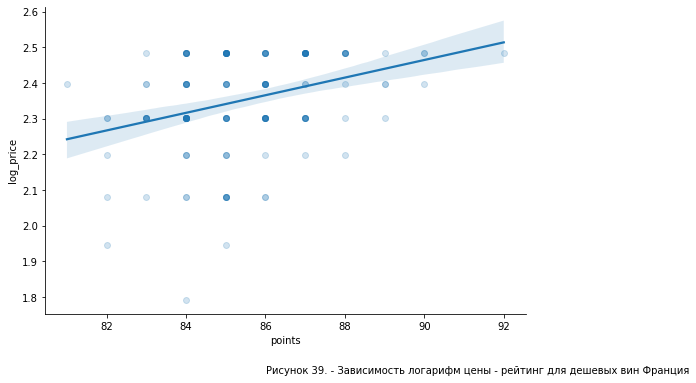

In [148]:
df_cheap_price_fr = df_fr.query("price_category == 1")
sns.lmplot(x='points', y='log_price', data=df_cheap_price_fr, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 39. - Зависимость логарифм цены - рейтинг для дешевых вин Франция")

In [149]:
print("Коэффициент корреляции между признаками log_price и points для дешевых вин Франция составляет %.2f" % \
      df_cheap_price_fr.points.corr(df_cheap_price_fr.log_price))

Коэффициент корреляции между признаками log_price и points для дешевых вин Франция составляет 0.33


Text(0.5, -0.05, 'Рисунок 40. - Зависимость логарифм цены - рейтинг для вин средней ценовой категории Франция')

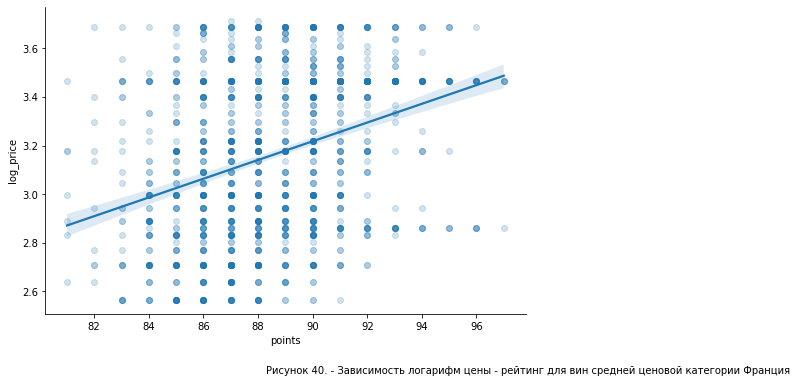

In [150]:
df_middle_price_fr = df_fr.query("price_category == 2")
sns.lmplot(x='points', y='log_price', data=df_middle_price_fr, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 40. - Зависимость логарифм цены - рейтинг для вин средней ценовой категории Франция")

In [151]:
print("Коэффициент корреляции между признаками log_price и points для вин средней ценовой категории Франция составляет %.2f" % \
      df_middle_price_fr.points.corr(df_middle_price_fr.log_price))

Коэффициент корреляции между признаками log_price и points для вин средней ценовой категории Франция составляет 0.33


Text(0.5, -0.05, 'Рисунок 41. - Зависимость логарифм цены - рейтинг для дорогих вин Франция')

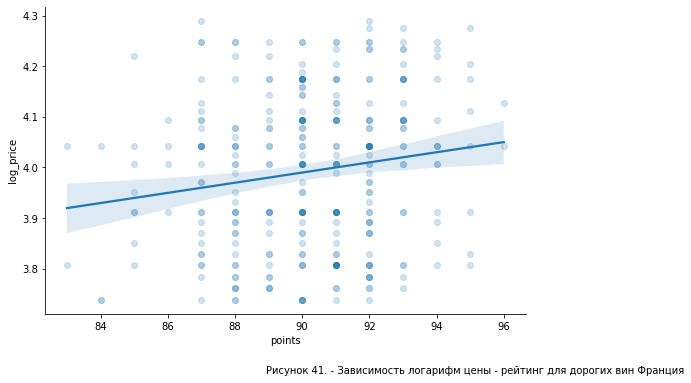

In [152]:
df_expensive_price_fr = df_fr.query("price_category == 3")
sns.lmplot(x='points', y='log_price', data=df_expensive_price_fr, aspect=1.5, scatter_kws={'alpha':0.2})
plt.figtext(0.5, -0.05, "Рисунок 41. - Зависимость логарифм цены - рейтинг для дорогих вин Франция")

In [153]:
print("Коэффициент корреляции между признаками log_price и points для дорогих вин Франция составляет %.2f" % \
      df_expensive_price_fr.points.corr(df_expensive_price_fr.log_price))

Коэффициент корреляции между признаками log_price и points для дорогих вин Франция составляет 0.16


Признак 'price_category' влияет на зависимость цена - рейтинг.
Зависимости цена - рейтинг в разрезе ценовых категорий для отдельно взятой страны выше, чем аналогичные зависимости для всей выборки.

Построим три регрессионых модели, показывающих зависимость между рейтингом и ценой на вино для Фрнанции:
    - в первой будем использовать только признак 'log_price'
    - во второй добавим признак 'price_category'
    - в третьей используем признаки 'log_price', 'price_category'и 'color'

##### Регрессионная модель 1
Зависимость цены от рейтинга для выборки по Франции

In [154]:
from sklearn.model_selection import train_test_split  
X = df_fr[['points']]
y = df_fr[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
y_train.shape, y_test.shape

((1369, 1), (588, 1))

Обучим линейную регрессию и найдем веса и коэффициенты модели

In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)  
w_1 = model.coef_
b_1 = model.intercept_
print("модель 1 имеет коэффициент %.2f и свободный член %.2f" % (w_1[0][0], b_1[0]))

модель 1 имеет коэффициент 0.08 и свободный член -4.23


Визуализация результатов проверки модели 1 для зависимости рейтинг - цена

Text(0.5, -0.05, 'Рисунок 42. - Визуализация результатов проверки модели 1 для зависимости рейтинг - цена')

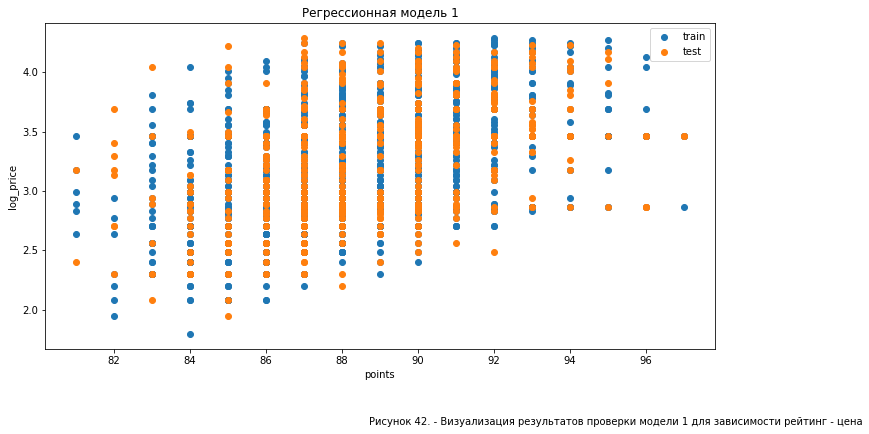

In [156]:
plt.figure(figsize=(12, 6)) 
plt.scatter(X_train, y_train, label='train') 
plt.scatter(X_test, y_test, label='test') 
plt.xlabel("points")
plt.ylabel("log_price")
plt.title("Регрессионная модель 1")
plt.legend()
plt.figtext(0.5, -0.05, "Рисунок 42. - Визуализация результатов проверки модели 1 для зависимости рейтинг - цена")

Оценка качества модели

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error  
y_train_prediction = model.predict(X_train) 
y_test_prediction = model.predict(X_test)
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction)) 
test_mse_1 = mean_squared_error(y_test, y_test_prediction)
print('Test MSE: ', test_mse_1)  
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction)) 
test_mae_1 = mean_absolute_error(y_test, y_test_prediction)
print('Test MAE: ', test_mae_1)

Train MSE:  0.19145674910562907
Test MSE:  0.20132099989538416
Train MAE:  0.361452373378002
Test MAE:  0.36720634788099665


##### Регрессионная модель 2
Зависимость цены от рейтинга для выборки по Франции c дополнительным признаком 'price_category'

In [158]:
X = df_fr[['points', 'price_category']]
y = df_fr[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
y_train.shape, y_test.shape

((1369, 1), (588, 1))

Обучим линейную регрессию и найдем веса и коэффициенты модели

In [159]:
model = LinearRegression()  
model.fit(X_train, y_train)  
w_2 = model.coef_
b_2 = model.intercept_
print("модель 2 имеет коэффициенты %.2f, %.2f и свободный член %.2f" % (w_2[0][0], w_2[0][1], b_2[0]))

модель 2 имеет коэффициенты 0.03, 0.75 и свободный член -1.29


Визуализация результатов проверки модели 2 для зависимости рейтинг - цена

Text(0.5, -0.05, 'Рисунок 43. - Визуализация результатов проверки модели 2 для зависимости рейтинг - цена')

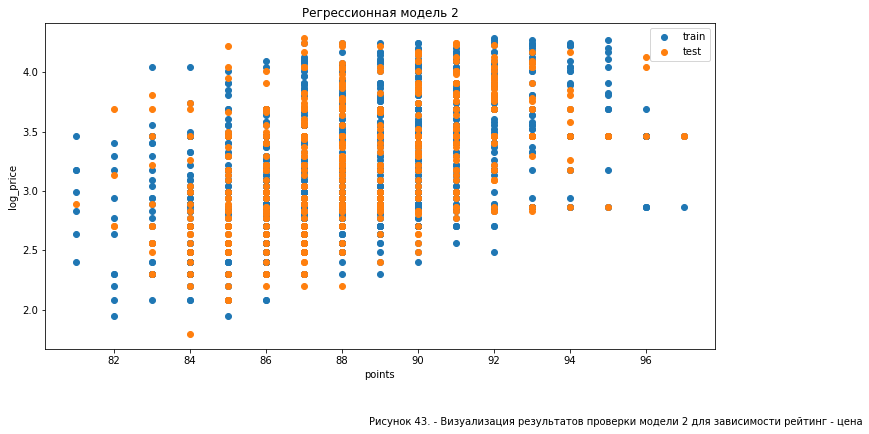

In [160]:
plt.figure(figsize=(12, 6)) 
plt.scatter(X_train['points'], y_train, label='train') 
plt.scatter(X_test['points'], y_test, label='test') 
plt.xlabel("points")
plt.ylabel("log_price")
plt.title("Регрессионная модель 2")
plt.legend()
plt.figtext(0.5, -0.05, "Рисунок 43. - Визуализация результатов проверки модели 2 для зависимости рейтинг - цена")

Оценка качества модели

In [161]:
y_train_prediction = model.predict(X_train) 
y_test_prediction = model.predict(X_test)
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction)) 
test_mse_2 = mean_squared_error(y_test, y_test_prediction)
print('Test MSE: ', test_mse_2)  
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction)) 
test_mae_2 = mean_absolute_error(y_test, y_test_prediction)
print('Test MAE: ', test_mae_2)

Train MSE:  0.07862270585731625
Test MSE:  0.08059062059660725
Train MAE:  0.23228361213573165
Test MAE:  0.23755380558265685


##### Регрессионная модель 3
Зависимость цены от рейтинга для выборки по Франции c дополнительными признаками 'price_category' и 'color'

Переведем признак 'color' в цифровой вид

In [165]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_fr['color'] = label_encoder.fit_transform(df_fr['color'])
df_fr.head()

,country,points,price,province,variety,winery,price_category,color,continent,log_price
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,1,Europe,3.688879
13,France,87,13.0,Bordeaux,Bordeaux-style Red Blend,Château des Combes,2,1,Europe,2.564949
17,France,89,34.0,Burgundy,Chardonnay,Henri de Villamont,2,2,Europe,3.526361
29,France,84,9.0,Beaujolais,Gamay,Jean-Claude Debeaune,1,0,Europe,2.197225
57,France,90,50.0,Burgundy,Pinot Noir,Jaffelin,3,1,Europe,3.912023


Проверим, влияет ли признак 'color' на зависимость цены от рейтинга

Text(0.5, -0.05, 'Рисунок 44. - Зависимость рейтинг цена в разрезе признака цвет')

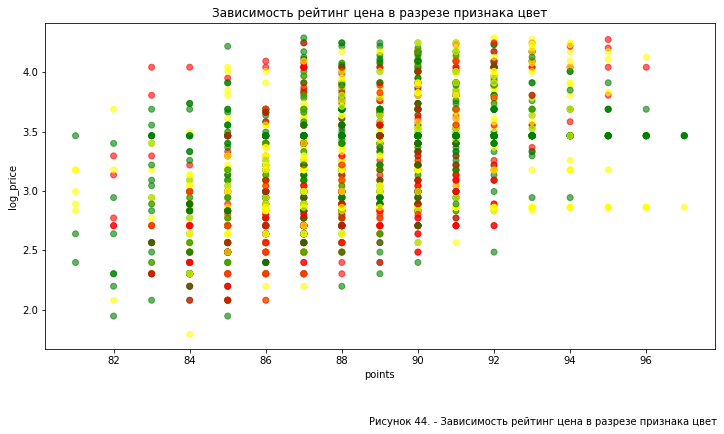

In [166]:
plt.subplots(figsize=(12,6)) 
colors = {0:'red', 1:'green', 2:'yellow'} 
plt.scatter(df_fr['points'], df_fr['log_price'],alpha=0.6, c= df_fr['color'].apply(lambda x: colors[x])) 
plt.title('Зависимость рейтинг цена в разрезе признака цвет') 
plt.xlabel('points') 
plt.ylabel('log_price');
plt.figtext(0.5, -0.05, "Рисунок 44. - Зависимость рейтинг цена в разрезе признака цвет")

Возможно какое-то влияние есть. Добавим признак в модель

In [167]:
X = df_fr[['points', 'price_category', 'color']]
y = df_fr[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
y_train.shape, y_test.shape

((1369, 1), (588, 1))

Обучим линейную регрессию и найдем веса и коэффициенты модели

In [168]:
model = LinearRegression()  
model.fit(X_train, y_train)  
w_3 = model.coef_
b_3 = model.intercept_
print("модель 3 имеет коэффициенты %.2f, %.2f, %.2f и свободный член %.2f" % (w_3[0][0], w_3[0][1], w_3[0][2], b_3[0]))

модель 3 имеет коэффициенты 0.04, 0.74, 0.02 и свободный член -1.46


Визуализация результатов проверки модели 3 для зависимости рейтинг - цена

Text(0.5, -0.05, 'Рисунок 45. - Визуализация результатов проверки модели 3 для зависимости рейтинг - цена')

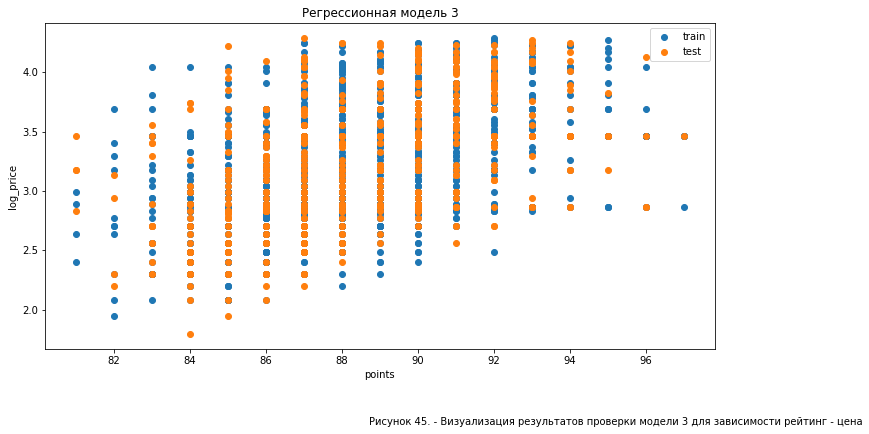

In [169]:
plt.figure(figsize=(12, 6)) 
plt.scatter(X_train['points'], y_train, label='train') 
plt.scatter(X_test['points'], y_test, label='test') 
plt.xlabel("points")
plt.ylabel("log_price")
plt.title("Регрессионная модель 3")
plt.legend()
plt.figtext(0.5, -0.05, "Рисунок 45. - Визуализация результатов проверки модели 3 для зависимости рейтинг - цена")

Оценка качества модели

In [170]:
y_train_prediction = model.predict(X_train) 
y_test_prediction = model.predict(X_test)
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction)) 
test_mse_3 = mean_squared_error(y_test, y_test_prediction)
print('Test MSE: ', test_mse_3)  
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction)) 
test_mae_3 = mean_absolute_error(y_test, y_test_prediction)
print('Test MAE: ', test_mae_3)

Train MSE:  0.07741384219503766
Test MSE:  0.08307846483902251
Train MAE:  0.22998418179311314
Test MAE:  0.23829901558803404


Сравним качество 3-х моделей

In [171]:
model_result = pd.DataFrame(
    {'Модель': ['Модель с признаком log_price', 'Модель с признаками log_price и category_price', \
     'Модель с log_price, category_price, color'],
     'MSE': [test_mse_1, test_mse_2, test_mse_3],
     'MAE': [test_mae_1, test_mae_2, test_mae_3],
     'K1': [w_1[0][0], w_2[0][0], w_3[0][0]],
     'K2': [0, w_2[0][1], w_3[0][1]],
     'K3': [0, 0, w_3[0][2]],
     'B': [ b_1[0], b_2[0], b_3[0]]}
)
model_result

,Модель,MSE,MAE,K1,K2,K3,B
0,Модель с признаком log_price,0.201321,0.367206,0.084312,0.000000,0.000000,-4.233342
1,Модель с признаками log_price и category_price,0.080591,0.237554,0.033234,0.754423,0.000000,-1.287408
2,"Модель с log_price, category_price, color",0.083078,0.238299,0.035395,0.738033,0.020362,-1.457488


Исходя из представленных метрик, качество модели 2 выше чем у моделей 1 и 3
<br>   
<br>  
<br>

#### Результаты этапа 3
Была исследована зависимость между рейтингом и ценой. Зависимость имеет коэффициент корреляции 0.5 для общей выборки.
Так же были построены зависимости рейтинг-цена в разрезе категорий стоимости вина. Коэффициент корреляции отличается по
категориям.
Те же действия были выполнены для отдельно взятой страны - Франции.
Были построены 3 регрессионных модели для предсказания цены в завиисмости от рейтинга. Модели строились для Франции, где
находится наш теоретический интернет-магазин.
Лучшие результаты показа модель 2 в которой использованы признаки: 'log_price', 'category_price'
<br>   
<br>  
<br>    

### <a name="5">4. Проверка гипотез </a>

В этом разделе продолжим исследование рынка вина и попробуем доказать гипотезу: средние цены на красное и белое вино - отличаются.
Посмотрим на средние значения

In [172]:
print("Средняя цена на красное вино %.2f, на белое %.2f" % (df.query("color == 'red'")['price'].mean(), \
                                                          df.query("color == 'white'")['price'].mean()))

Средняя цена на красное вино 29.97, на белое 22.58


Средние значения отличаются. Сравним распределения

In [173]:
df.query("color == 'red'")['price'].describe()

count    8286.000000
mean       29.968139
std        15.144740
min         5.000000
25%        18.000000
50%        28.000000
75%        40.000000
max        85.000000
Name: price, dtype: float64

In [174]:
df.query("color == 'white'")['price'].describe()

count    3908.000000
mean       22.575742
std        11.995297
min         5.000000
25%        15.000000
50%        19.000000
75%        26.000000
max        82.000000
Name: price, dtype: float64

Медианное и среднее значения отличаются для обоих цветов. 

Text(0.5, -0.05, 'Рисунок 46. - Сравнение распределений цен на красное и белое вино')

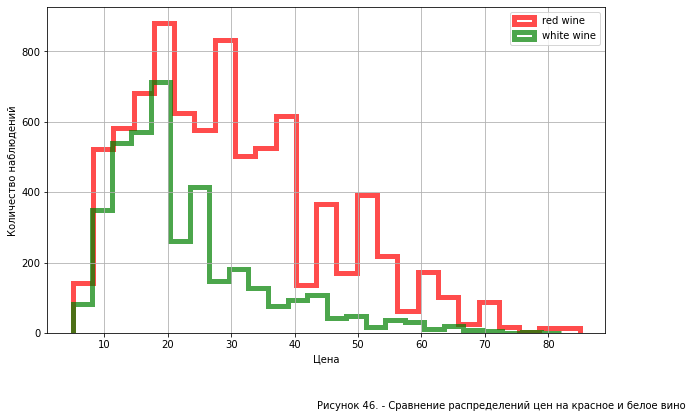

In [175]:
ax = df.query("color == 'red'").plot(kind='hist', y='price', histtype='step', bins=25, \
                                     linewidth=5, alpha=0.7, label='red wine', figsize = (10, 6), color=['red']) 
df.query("color == 'white'").plot(kind='hist', y='price', histtype='step', bins=25, linewidth=5, \
                                  alpha=0.7, label='white wine', ax=ax, grid=True, legend=True, color=['green'])
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, -0.05, "Рисунок 46. - Сравнение распределений цен на красное и белое вино")


Распределения явно отличаются от нормального. Попробуем доказать гипотезу на выборке для отдельно взятой страны - Франции

In [176]:
print("Средняя цена на красное вино %.2f, на белое %.2f" % (df.query("color == 'red' and country == 'France'")['price'].mean(), \
                                                          df.query("color == 'white' and country == 'France'")['price'].mean()))

Средняя цена на красное вино 30.55, на белое 28.18


In [177]:
df.query("color == 'red' and country == 'France'")['price'].describe()

count    881.000000
mean      30.548241
std       13.141373
min        7.000000
25%       20.000000
50%       32.000000
75%       35.000000
max       73.000000
Name: price, dtype: float64

In [178]:
df.query("color == 'white' and country == 'France'")['price'].describe()

count    616.000000
mean      28.183442
std       15.083657
min        6.000000
25%       17.500000
50%       24.000000
75%       36.000000
max       73.000000
Name: price, dtype: float64

Text(0.5, -0.05, 'Рисунок 47. - Сравнение распределений цен на красное и белое вино Франция')

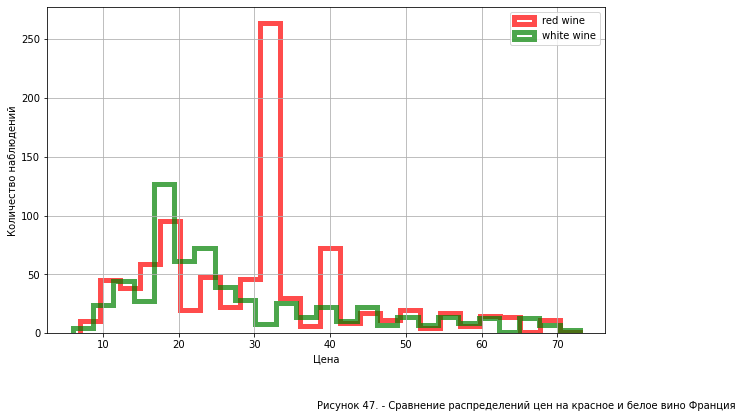

In [179]:
ax = df.query("color == 'red' and country == 'France'").plot(kind='hist', y='price', histtype='step', bins=25, \
                                     linewidth=5, alpha=0.7, label='red wine', figsize = (10, 6), color=['red']) 
df.query("color == 'white' and country == 'France'").plot(kind='hist', y='price', histtype='step', bins=25, linewidth=5, \
                                  alpha=0.7, label='white wine', ax=ax, grid=True, legend=True, color=['green'])
plt.ylabel('Количество наблюдений')
plt.xlabel('Цена')
plt.figtext(0.5, -0.05, "Рисунок 47. - Сравнение распределений цен на красное и белое вино Франция")

Для Франции распределение ближе к нормальному. Для доказательства гипотезы будем использовать эту выборку.
Сравним дисперсии

In [180]:
print("Дисперсия признака price для красного вина %.2f, для белого %.2f" % \
(df.query("color == 'red' and country == 'France'").price.var(), \
 df.query("color == 'white' and country == 'France'").price.var()))

Дисперсия признака price для красного вина 172.70, для белого 227.52


Дисперсии не равны, будем это учитывать при проверке гипотезы.
Установим уровень значимости = 0.05 Для проверки гипотезы используем критерий Стьюдента сравнения средних

In [181]:
crit = 0.05
H0 = "Средние цены на красное и белое вино одинаковы"
H1 = "Средние цены на красное и белое вино различны"
x = np.array(df.query("color == 'red' and country == 'France'").price)
y = np.array(df.query("color == 'white' and country == 'France'").price)
t, p_value = st.ttest_ind(x, y, axis = 0, equal_var=False)
if p_value < crit:
    print('%s с вероятностью %.0f %%' % (H1, (1 - crit) * 100))
else:
    print('%s с вероятностью %.0f %%' % (H0, (1 - crit) * 100))

Средние цены на красное и белое вино различны с вероятностью 95 %


Гипотеза "Средние цены на красное и белое вино различны" доказана. Следующая гипотеза:
H0: Средние цены на красное и белое вино одинаковы 
H1: Средние цены на красное вино выше чем на белое    

In [182]:
H0 = "Средние цены на красное и белое вино одинаковы"
H1 = "Средние цены на красное вино выше чем на белое"
x = np.array(df.query("color == 'red' and country == 'France'").price)
y = np.array(df.query("color == 'white' and country == 'France'").price)
t, p_value = st.ttest_ind(x, y, axis = 0, equal_var=False,  alternative='greater')
if p_value < crit:
    print('%s с вероятностью %.0f %%' % (H1, (1 - crit) * 100))
else:
    print('%s с вероятностью %.0f %%' % (H0, (1 - crit) * 100))

Средние цены на красное вино выше чем на белое с вероятностью 95 %


##### Итоги раздела 4
Было продолжено исследование рынка вина. Были доказаны 2 гипотезы для рынка отдельно взятой страны - Франции:
    - Средние цены на красное и белое вино отличаются
    - Средние цены на красное вино выше чем на белое
<br>    
<br>  
<br>  
 

### <a name="6">5. Выводы для руководства интернет-магазина вина</a>

Наш теоретический интернет-магазин вина расположен во Франции. По результатам исследования можно сделать ряд выводов, касающихся ассортимента магазина. Так же на основании этих заключений можно спаланировать рекламную компанию по продвижению товаров

In [67]:
df = pd.read_csv('wine_reviews_correct_1.csv', index_col = 0)
df_fr = df.query("country == 'France'").copy()

Во Франции больше всего любят красное вино, но и другие цвета должны присутствовать в ассортименте. Распределение по цветам:

Text(0.5, 0, 'Рисунок 48. - Ассортимент ИМ по цветам вина')

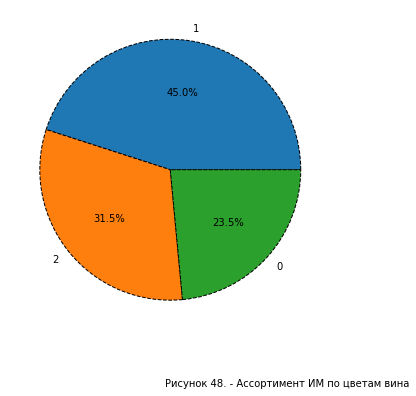

In [183]:
color_wine_fr = df_fr.color.value_counts()/len(df_fr)
weight_list = color_wine_fr.values
name_labels = color_wine_fr.index
plt.figure(figsize=(6, 6))
plt.pie(weight_list, labels=name_labels, autopct='%1.1f%%', wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 48. - Ассортимент ИМ по цветам вина")

В ассортименте обязательно должны присутствовать наиболее популярные вина. Топ-10 вин во Франции:

Text(0.5, -0.2, 'Рисунок 49. - Топ-10 популярных вин')

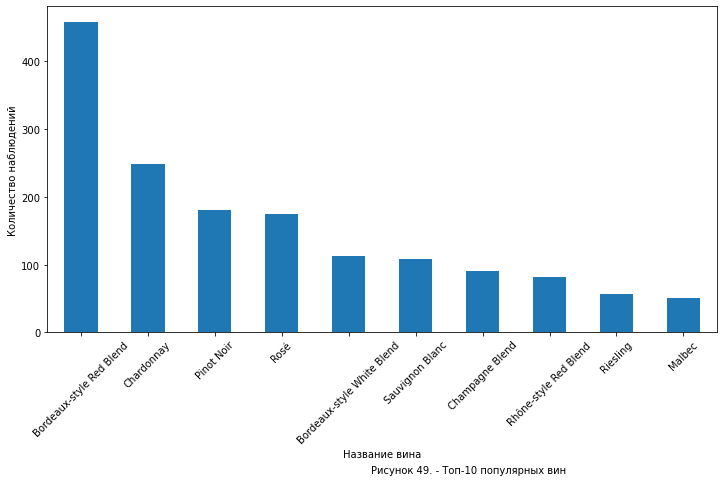

In [184]:
name_count = df_fr.variety.value_counts().sort_values(ascending = False)
name_count.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Количество наблюдений')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 49. - Топ-10 популярных вин")

Операторы call-центра должны ориентироваться в рынке вина и знать названия самых качественных (высоко оцененных) вин. Данные вина так же должны присутствовать в ассортименте магазина.

Text(0.5, -0.2, 'Рисунок 50. - Топ-10 наименований вина с самым высоким рейтингом')

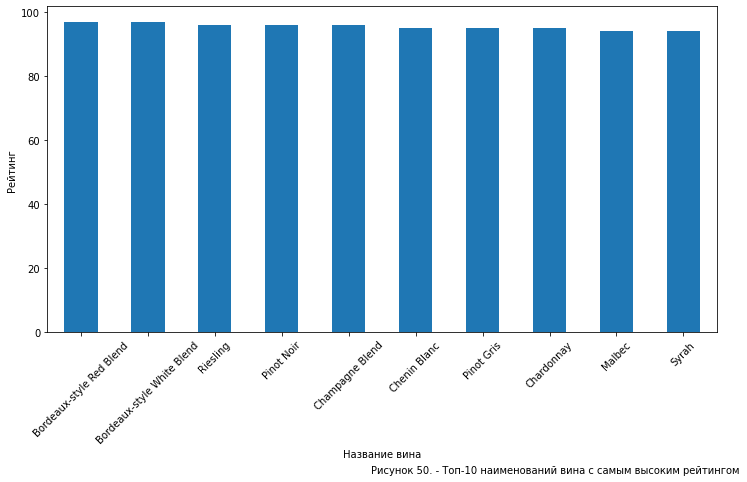

In [185]:
raiting = df_fr.groupby('variety')['points'].max().sort_values(ascending = False)
raiting.head(10).plot(kind='bar', figsize=(12,6))
plt.ylabel('Рейтинг')
plt.xlabel('Название вина')
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.2, "Рисунок 50. - Топ-10 наименований вина с самым высоким рейтингом")

Вино было поделено на 3 ценовых категории: дешевое, среднее по цене и дорогое. Ассортимент по ценовым категориям может выглядеть как:

Text(0.5, 0, 'Рисунок 51. - Ассортимент ИМ по ценовым категориям')

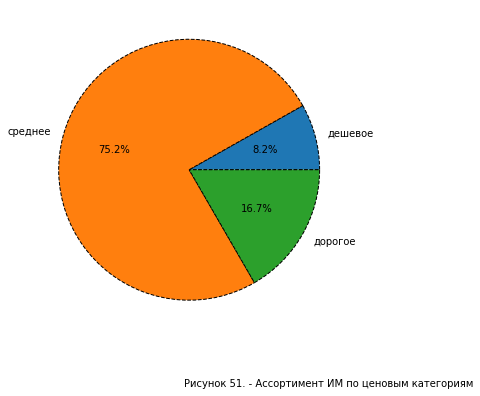

In [186]:
category_price_fr = df_fr.groupby('price_category').count()
name_category_price = {1: 'дешевое', 2: 'среднее', 3: 'дорогое'}
category_price_fr['name_cat_price'] = category_price_fr.index.map(name_category_price)
category_price_fr['weight'] = category_price_fr['country']/category_price_fr['country'].sum()
plt.figure(figsize=(6, 6))
plt.pie(category_price_fr.weight, labels=category_price_fr.name_cat_price, autopct='%1.1f%%', \
        wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 51. - Ассортимент ИМ по ценовым категориям")

Ядро ассортимента - вина средней ценовой категории

Ассортимент наименований дешевого вина

In [187]:
assortiment_cheap_price = df_fr.query("price_category == 1")
as_cheap = assortiment_cheap_price.variety.value_counts(normalize=True)
as_cheap

Rosé                          0.20625
Bordeaux-style Red Blend      0.11250
Sauvignon Blanc               0.08125
Chardonnay                    0.08125
Gamay                         0.06250
White Blend                   0.05625
Merlot                        0.05000
Bordeaux-style White Blend    0.04375
Syrah                         0.04375
Rhône-style Red Blend         0.03750
Sparkling Blend               0.03125
Red Blend                     0.03125
Pinot Noir                    0.03125
Chenin Blanc                  0.03125
Rhône-style White Blend       0.02500
Malbec                        0.02500
Pinot Blanc                   0.01875
Champagne Blend               0.01250
Shiraz                        0.00625
Cabernet Franc                0.00625
Cabernet Sauvignon            0.00625
Name: variety, dtype: float64

Text(0.5, 0, 'Рисунок 52. - Ассортимент ИМ для категории дешевое вино')

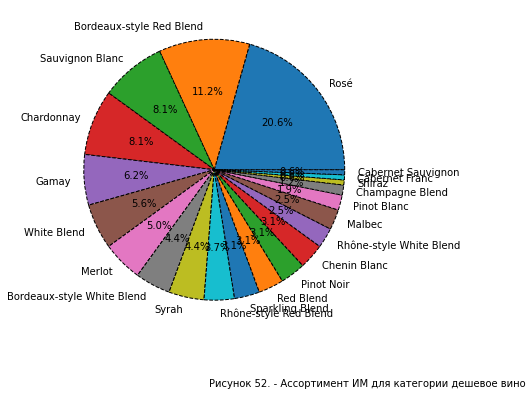

In [188]:
plt.figure(figsize=(6, 6))
plt.pie(as_cheap.values, labels=as_cheap.index, autopct='%1.1f%%', \
        wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 52. - Ассортимент ИМ для категории дешевое вино")

In [ ]:
Ассортимент наименований средней ценовой категории

In [189]:
assortiment_mean_price = df_fr.query("price_category == 2")
as_mean = assortiment_mean_price.variety.value_counts(normalize=True)
as_mean

Bordeaux-style Red Blend      0.277362
Chardonnay                    0.108770
Rosé                          0.091094
Pinot Noir                    0.077498
Bordeaux-style White Blend    0.070020
Sauvignon Blanc               0.059143
Rhône-style Red Blend         0.042828
Malbec                        0.029232
Riesling                      0.027872
Gamay                         0.025833
Red Blend                     0.023793
Chenin Blanc                  0.019035
Sparkling Blend               0.018355
Syrah                         0.017675
Gewürztraminer                0.016315
Champagne Blend               0.016315
Pinot Gris                    0.015636
Pinot Blanc                   0.014956
Cabernet Franc                0.013596
White Blend                   0.012237
Rhône-style White Blend       0.010877
Merlot                        0.004079
Grenache                      0.002719
Cabernet Sauvignon            0.002039
Shiraz                        0.001360
Mourvèdre                

Text(0.5, 0, 'Рисунок 53. - Ассортимент ИМ для средней ценовой категории')

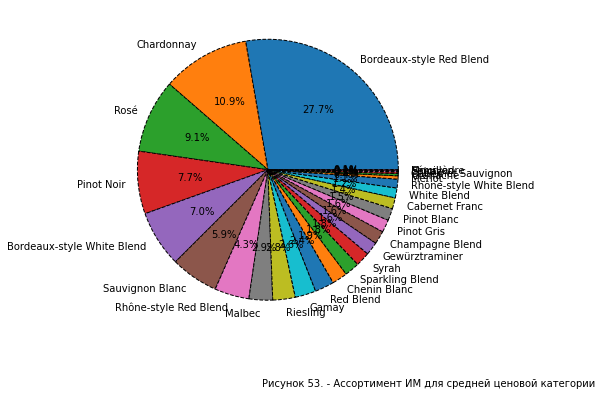

In [190]:
plt.figure(figsize=(6, 6))
plt.pie(as_mean.values, labels=as_mean.index, autopct='%1.1f%%', \
        wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 53. - Ассортимент ИМ для средней ценовой категории")

In [ ]:
Ассортимент наименований дорогого вина

In [191]:
assortiment_expensive_price = df_fr.query("price_category == 3")
as_exp = assortiment_expensive_price.variety.value_counts(normalize=True)
as_exp

Chardonnay                    0.233129
Champagne Blend               0.199387
Pinot Noir                    0.190184
Bordeaux-style Red Blend      0.098160
Riesling                      0.046012
Rhône-style Red Blend         0.039877
Syrah                         0.039877
Sauvignon Blanc               0.024540
Rosé                          0.021472
Gewürztraminer                0.021472
Chenin Blanc                  0.015337
Viognier                      0.015337
Pinot Gris                    0.012270
Bordeaux-style White Blend    0.009202
Malbec                        0.009202
Rhône-style White Blend       0.006135
Red Blend                     0.006135
Grenache                      0.006135
Gamay                         0.003067
Cabernet Sauvignon            0.003067
Name: variety, dtype: float64

Text(0.5, 0, 'Рисунок 53. - Ассортимент ИМ для категории дорогое вино')

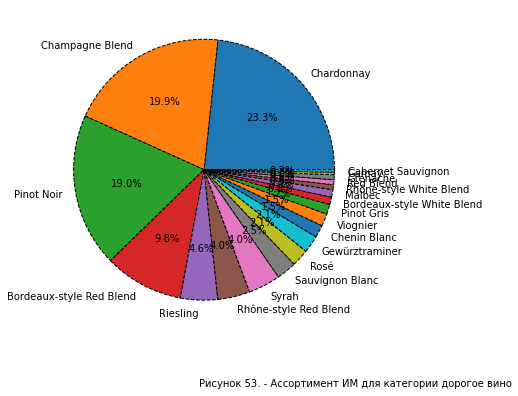

In [192]:
plt.figure(figsize=(6, 6))
plt.pie(as_exp.values, labels=as_exp.index, autopct='%1.1f%%', \
        wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"})
plt.figtext(0.5, 0, "Рисунок 53. - Ассортимент ИМ для категории дорогое вино")

В процессе исследования была построена регрессионная модель расчета цены исходя из значений признаков: 'points', 'price_category':
        right_price = np.exp('points' * 0.0332 + 'price_category' * 0.77544 - 1.2874)               

Исходя из значений признаков 'points', 'price_category' мы можем рассчитать некую справедливую цену на кокретное наименование вина. Используя ее мы можем устанавливать цены продажи в нашем ИМ и определять справедливые закупочные цены

In [193]:
df_fr['right_price'] = np.exp(df_fr['points'] * 0.033234 + df_fr['price_category'] * 0.754423 - 1.287408)
df_fr.head()

,country,points,price,province,variety,winery,price_category,color,continent,log_price,right_price
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,2,1,Europe,3.688879,25.680501
13,France,87,13.0,Bordeaux,Bordeaux-style Red Blend,Château des Combes,2,1,Europe,2.564949,22.483821
17,France,89,34.0,Burgundy,Chardonnay,Henri de Villamont,2,2,Europe,3.526361,24.029062
29,France,84,9.0,Beaujolais,Gamay,Jean-Claude Debeaune,1,0,Europe,2.197225,9.570362
57,France,90,50.0,Burgundy,Pinot Noir,Jaffelin,3,1,Europe,3.912023,52.821642


Кроме того, используя справедливую цену можно определить потенциально недооцененные вина. Эти вина можно продавать дороже
и получать дополнительный доход.
Добавим колонку с разницей справедливой цены и фактической

In [194]:
df_fr['delta_price'] = df_fr['price'] - df_fr['right_price']
as_profit_wine = df_fr.query("delta_price > 0")

In [113]:
as_profit_wine_ = as_profit_wine.pivot_table(index='variety', values='delta_price', aggfunc='mean')
as_profit_wine_.sort_values(by='delta_price', ascending=False, inplace=True)
as_profit_wine_

,delta_price
variety,
Viognier,12.959781
Pinot Noir,11.116679
Pinot Gris,9.654267
Champagne Blend,8.941133
Rhône-style White Blend,8.388097
Gewürztraminer,7.524779
Chenin Blanc,7.495434
Rhône-style Red Blend,6.844273
Syrah,6.820564


В итоге получен список потенциально недооцененных вин и определено на сколько можно поднять цену от средних значений.
<br>
<br>
<br>


#### Итоги раздела 6
Определен ассортимент вин, теоретического интернет-магазина вина во Франции, в разрезе:
    - цвет
    - цена
Рассчитана "справедливая" цена на вино.
Определена дополнительная наценка для недооцененных вин
<br>
<br>
<br>
<br>
<br>
<br>